In [1]:
#### Importat modules 
import scipy.io
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime,timedelta
import numpy as np
import scipy.ndimage
import matplotlib.dates as mdates
from collections import defaultdict
import cartopy.crs as ccrs
from scripts.functions.mpmap import mpmap
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from scripts.functions.initncdf import initncdf
import glob
from function import smoothr
from scipy.stats import linregress

from datetime import date
from dateutil.relativedelta import relativedelta
from hovmoeller import hovmoeller
import scipy.ndimage

from matplotlib import gridspec

import glob 

import matplotlib.colors as mplc
from matplotlib.ticker import FormatStrFormatter

from sklearn import linear_model
import pandas


# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

import seaborn as sns
import pandas as pd

In [2]:
box=[140,275] # REAL ONE 
sm=3

In [3]:
# ################################################################################################
# #                                pizza 3 climates 
# ################################################################################################

path='/Users/martin/data/CESM1/download/'

# MLD time slices 
filemat_mld_0ka=path+'cesm.b.e12.0ka.002.301_400.mld_clim.mat'
filemat_mld_3ka=path+'cesm.b.e12.3ka.001.301_400.mld_clim.mat'
filemat_mld_6ka=path+'cesm.b.e12.B1850C5.f19_g16.6ka.001.201_600.mld_clim.mat'
filemat_mld_9ka=path+'cesm.b.e12.9ka.001.301_400.mld_clim.mat'
filemat_mld_11ka=path+'cesm.b.e12.11ka.001.201_300.mld_clim.mat'
filemat_mld_12ka=path+'cesm.b.e12.12ka.001.301_400.mld_clim.mat'
filemat_mld_13p5ka=path+'cesm.b.e12.13p5ka.001.201_300.mld_clim.mat'
filemat_mld_15ka=path+'cesm.b.e12.15ka.001.401_500.mld_clim.mat'
filemat_mld_17ka=path+'cesm.b.e12.17ka.001.301_400.mld_clim.mat'
filemat_mld_18ka=path+'cesm.b.e12.18ka.001.201_300.mld_clim.mat'
filemat_mld_21ka=path+'cesm.b.e12.21ka.002.201_300.mld_clim.mat'
filemat_mld_24ka=path+'cesm.b.e12.24ka.001.301_400.mld_clim.mat'

# # Hov time slices 
filemat_0ka=path+'cesm.0ka.1_600.Qbudget.mld05.hov.5S-5N.mat'
filemat_3ka=path+'cesm.3ka.101_400.Qbudget.mld05.hov.5S-5N.mat'
filemat_6ka=path+'cesm.6ka.201_600.Qbudget.mld05.hov.5S-5N.mat'
filemat_9ka=path+'cesm.9ka.101_400.Qbudget.mld05.hov.5S-5N.mat'
filemat_11ka=path+'cesm.11ka.101_300.Qbudget.mld05.hov.5S-5N.mat'
filemat_12ka=path+'cesm.12ka.101_400.Qbudget.mld05.hov.5S-5N.mat'
filemat_13p5ka=path+'cesm.13p5ka.101_300.Qbudget.mld05.hov.5S-5N.mat'
filemat_15ka=path+'cesm.15ka.101_500.Qbudget.mld05.hov.5S-5N.mat'
filemat_17ka=path+'cesm.17ka.101_300.Qbudget.mld05.hov.5S-5N.mat'
filemat_18ka=path+'cesm.18ka.101_400.Qbudget.mld05.hov.5S-5N.mat'
filemat_21ka=path+'cesm.21ka.101_600.Qbudget.mld05.hov.5S-5N.mat'
filemat_24ka=path+'cesm.24ka.101_400.Qbudget.mld05.hov.5S-5N.mat'

# Hov time slices 
# filemat_0ka=path+'cesm.0ka.1_600.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_3ka=path+'cesm.3ka.101_400.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_6ka=path+'cesm.6ka.201_600.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_9ka=path+'cesm.9ka.101_400.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_11ka=path+'cesm.11ka.101_300.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_12ka=path+'cesm.12ka.101_400.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_13p5ka=path+'cesm.13p5ka.101_300.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_0ka=path+'cesm.0ka.101_500.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_17ka=path+'cesm.17ka.101_300.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_18ka=path+'cesm.18ka.101_400.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_21ka=path+'cesm.21ka.101_500.Qbudget.mld05.hov.2p5S-2p5N.mat'
# filemat_24ka=path+'cesm.24ka.101_400.Qbudget.mld05.hov.2p5S-2p5N.mat'



# 2Xco2
filemat_mld_2xco2='/Users/martin/data/CESM1/Paleo/2xco2/cesm.b.e12.B1850C5.f19_g16.2xCO2.001.301_500.mld_clim.mat'
filemat_2xco2='/Users/martin/data/CESM1/Paleo/2xco2/cesm.2xCO2.201_600.Qbudget.mld05.hov.5S-5N.mat'
# filemat_2xco2='/Users/martin/data/CESM1/Paleo/2xco2/cesm.2xCO2.201_600.Qbudget.mld05.hov.2p5S-2p5N.mat'

In [4]:
# Automatic sim vector 
sim=''
sim_name=''
sim_time=[]
# Try global warming run 
try:
    eval('filemat_2xco2')
except NameError:
    sim=sim
else:
    sim=sim+' '+'2xco2'
    sim_time.extend([-3])
    sim_name=sim_name+' '+'2xCO2'

# Try time slices run  
for i in range(100):
    i=int(i)
    try:
        eval('filemat_'+str(i)+'ka')
    except NameError:
        try:
            eval('filemat_'+str(i)+'p5ka')
        except NameError:
            sim=sim
        else:
            sim=sim+' '+str(i)+'p5ka'
            sim_time.extend([i+0.5])
            sim_name=sim_name+' '+str(i)+'.5ka'
    else:
        sim=sim+' '+str(i)+'ka' 
        sim_name=sim_name+' '+str(i)+'ka'
        sim_time.extend([i])
        
sim=sim.split(), print('simulations :'+ str(sim))
sim=sim[0]
print('simulations time :'+ str(sim_time))
print('simulations name :'+ str(sim_name))

simulations : 2xco2 0ka 3ka 6ka 9ka 11ka 12ka 13p5ka 15ka 17ka 18ka 21ka 24ka
simulations time :[-3, 0, 3, 6, 9, 11, 12, 13.5, 15, 17, 18, 21, 24]
simulations name : 2xCO2 0ka 3ka 6ka 9ka 11ka 12ka 13.5ka 15ka 17ka 18ka 21ka 24ka


In [5]:
# Read Time 
time = defaultdict(dict)
for i in range(0,len(sim)):
    test_time= scipy.io.loadmat(eval('filemat_'+sim[i]))['year_mon']  # TIME 
    time[sim[i]][0]=test_time[:,0]                                         # YEARS 
    time[sim[i]][1]=test_time[:,1]                                         # MONTHS 

In [6]:
# Extract OCN/ATM and the MLD from the mat files 
struct= defaultdict(dict)
strc=['ocn','atm','mld05_clim']
filemat=['filemat','filemat','filemat_mld']
for j in range(0,len(strc)):
    for i in range(0,len(sim)):
        struct[i][j]= scipy.io.loadmat(eval(filemat[j]+'_'+sim[i]),struct_as_record=False, squeeze_me=True)[strc[j]]

In [7]:
# Extract OCN/ATM and the MLD from the mat files 

lon     = struct[0][0].lon
lon_atm = struct[0][1].lon

# Latitude for MLD subset
lat=scipy.io.loadmat(filemat_mld_0ka,struct_as_record=False, squeeze_me=True)['lat']

# Create time axis
for i in range(0,len(sim)):
    time[sim[i]][2]=mpl.dates.date2num([datetime((time[sim[i]][0])[j],(time[sim[i]][1])[j],1) for j in range(0,len((time[sim[i]][0])[:]),1)])
    
# Lon/Lat subsets 
lonbounds=box

indlon     = [np.where((lon >= lonbounds[0] )     & (lon <= lonbounds[1]))]
indlon_atm = [np.where((lon_atm >= lonbounds[0] ) & (lon_atm <= lonbounds[1]))]

# Latitude good indexes
indlat     = np.squeeze([np.where(np.absolute(np.squeeze(lat)) <= 5 )])
indlat_mld2= np.squeeze([np.where(np.absolute(np.squeeze(lat)) <= 5 )])

In [8]:
# Date min and max 
tbounds =[[1,1,1],[1600,12,31]]

indminmax= defaultdict(dict)
# index min / max 
for i in range(0,len(sim)):
        indminmax[i][0]=(np.abs(time[sim[i]][2]-mpl.dates.date2num(datetime(eval('tbounds[0][0]'),eval('tbounds[0][1]'),eval('tbounds[0][2]'))))).argmin()
        indminmax[i][1]=(np.abs(time[sim[i]][2]-mpl.dates.date2num(datetime(eval('tbounds[1][0]'),eval('tbounds[1][1]'),eval('tbounds[1][2]'))))).argmin()+1
        
# # time subset 
for i in range(0,len(sim)):
    for j in range(0,3):
        time[sim[i]][j]=time[sim[i]][j][indminmax[i][0]:indminmax[i][1]]
        
    time[sim[i]][3]=int(len(time[sim[i]][2])/12.)     # Nyr

--->   Read cont Oceanic variables

In [9]:
### READ OCEANIC AND ATMOSPHERIC VARIABLES 
ocean= defaultdict(dict)
atmos= defaultdict(dict)

var_ocn_name=['tos','TavgML','ztc','DTml','wos','uos']
var_atm_name=['tauu','pr']

for i in range(0,len(sim)):
    for j in range(0,len(var_ocn_name)):
        ocean[i][j]=np.squeeze(eval('struct[i][0].'+var_ocn_name[j]+'[indminmax[i][0]:indminmax[i][1],indlon]'))

for i in range(0,len(sim)):
    for j in range(0,len(var_atm_name)):
        atmos[i][j]=np.squeeze(eval('struct[i][1].'+var_atm_name[j]+'[indminmax[i][0]:indminmax[i][1],indlon_atm]'))


# Longitudes
lon_sub = np.squeeze(lon[indlon])
lon_atm_sub = np.squeeze(lon_atm[indlon_atm])

# Mixed layer depth 
mld= defaultdict(dict)
inc=0
for i in sim:
    mld[i]=np.squeeze(struct[inc][2][indlat[0]:indlat[-1]+1,indlon]) 
    mld[i]=np.ma.masked_where(np.squeeze([mld[i]==0.]), mld[i])   
    mld[i]=np.nanmean( mld[i],axis=0)

    mld[i+'2']=np.squeeze(struct[inc][2][indlat_mld2[0]:indlat_mld2[-1]+1,indlon]) 
    mld[i+'2']=np.ma.masked_where(np.squeeze([mld[i+'2']==0.]), mld[i+'2'])   
    mld[i+'2']=np.nanmean( mld[i+'2'],axis=0)
    
    inc=inc+1

--->   Process Hbudget variables 

In [10]:
### Read and process Heat budget terms 
#Coef = rho * cp * H / (nday_month * nhour_day * nmin_day * nsec_min)
add_depth=10

coef = defaultdict(dict)
for i in sim:
    Coe=(1022.4 * 3940. * (mld[i]+add_depth))/(30*24*60*60)
    coef[i]=1./(np.tile( (np.reshape(Coe,(1,int(len(np.squeeze(indlon)))))).transpose(),int(time[i][3]*12)).transpose())

hbudget        = defaultdict(dict)
hbudget_decomp = defaultdict(dict)

heat_varname=['qt','qw','qu','qv','qnet']
 
heat_decomp=[ 'qw_temp','qw_curr','qw_nl','qu_temp','qu_curr','qu_nl','qv_temp','qv_curr','qv_nl' ]   

for i in range(0,len(sim)):
    for j in range(0,len(heat_varname)):
        if (j == 1 or j ==2 or j ==3) and (sim[i] == '2xco2'):
            hbudget[i][j]=np.squeeze((eval('struct[i][0].'+heat_varname[j]+'[indminmax[i][0]:indminmax[i][1],indlon]')))*coef[sim[i]]/100
        else: 
            hbudget[i][j]=np.squeeze((eval('struct[i][0].'+heat_varname[j]+'[indminmax[i][0]:indminmax[i][1],indlon]')))*coef[sim[i]]

# decomposition of each term 
for i in range(0,len(sim)):
    for j in range(0,len(heat_decomp)):
        if (j == 0 or j ==2 or j == 3 or j == 5 or j == 6 or j == 8) and (sim[i] == '2xco2'):
            hbudget_decomp[i][j]=np.squeeze((eval('struct[i][0].'+heat_decomp[j]+'[indminmax[i][0]:indminmax[i][1],indlon]')))*coef[sim[i]]/100
        else: 
            hbudget_decomp[i][j]=np.squeeze((eval('struct[i][0].'+heat_decomp[j]+'[indminmax[i][0]:indminmax[i][1],indlon]')))*coef[sim[i]]

# Compute residu            
for i in range(0,len(sim)):
    hbudget[i][5]=np.squeeze(hbudget[i][0]-(hbudget[i][1]+hbudget[i][2]+hbudget[i][3]+hbudget[i][4]))



--->  Compute variables anomalies 

In [11]:
### COMPUTE ANOMALIES 
nlon=len(lon_sub)
nlon_atm=len(lon_atm_sub)

for i in range(0,len(sim)):
    for j in range(0,len(var_ocn_name)):
        test_sc=np.tile(np.nanmean( np.reshape(ocean[i][j],(time[sim[i]][3],12,nlon)),axis=0).transpose(),time[sim[i]][3]).transpose()
        ocean[sim[i]][var_ocn_name[j]+'_full']=np.reshape(ocean[i][j],(time[sim[i]][3],12,nlon))
        ocean[sim[i]][var_ocn_name[j]]=scipy.ndimage.filters.gaussian_filter(ocean[i][j]-test_sc,[0.75, 2], mode='nearest')
        ocean[sim[i]][var_ocn_name[j]+'_sc']=scipy.ndimage.filters.gaussian_filter(np.nanmean( np.reshape(ocean[i][j],(time[sim[i]][3],12,nlon)),axis=0), [0.75, 1.75], mode='nearest')

        
    for j in range(0,len(var_atm_name)):
        test_sc=np.tile(np.nanmean( np.reshape(atmos[i][j],(time[sim[i]][3],12,nlon_atm)),axis=0).transpose(),time[sim[i]][3]).transpose()
        atmos[sim[i]][var_atm_name[j]]=scipy.ndimage.filters.gaussian_filter(atmos[i][j]-test_sc,[1,0.75], mode='nearest')
        atmos[sim[i]][var_atm_name[j]+'_sc']=scipy.ndimage.filters.gaussian_filter(np.nanmean( np.reshape(atmos[i][j],(time[sim[i]][3],12,nlon_atm)),axis=0), [1,0.75], mode='nearest')
        atmos[sim[i]][var_atm_name[j]+'_full']=np.reshape(atmos[i][j],(time[sim[i]][3],12,nlon_atm))
        
    for k in range(0,len(heat_varname)):   
        test_sc=np.tile(np.nanmean( np.reshape(hbudget[i][k],(time[sim[i]][3],12,nlon)),axis=0).transpose(),time[sim[i]][3]).transpose()
        hbudget[sim[i]][heat_varname[k]]=scipy.ndimage.filters.gaussian_filter(hbudget[i][k]-test_sc, [0.75, 1.75], mode='nearest')
 
    for k in range(0,len(heat_decomp)):   
        test_sc=np.tile(np.nanmean( np.reshape(hbudget_decomp[i][k],(time[sim[i]][3],12,nlon)),axis=0).transpose(),time[sim[i]][3]).transpose()
        hbudget_decomp[sim[i]][heat_decomp[k]]=hbudget_decomp[i][k]-test_sc        



In [12]:
# Compute El Niño std in Winter FOR BOX  
nino_var=np.zeros([len(sim),12,nlon])
nino_var_dec_n3=np.zeros([len(sim)])
inc=0
indlon=np.squeeze(np.where((lon_sub > 190) & (lon_sub < 240)))
for i in sim: 
    var0=ocean[i]['tos']
    var0[np.isnan(var0)]=0
    var=np.reshape(var0,(time[i][3],12,nlon))
    nino_var[inc,:,:]=np.std(var,axis=0)

    nino_var_dec_n3[inc]=np.nanmean(np.nanmean(nino_var[inc,[10,11,0],:][:,indlon],axis=0))
    inc=inc+1

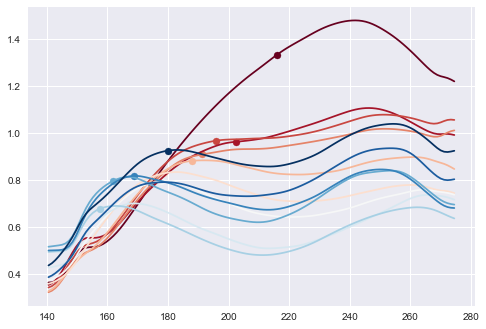

In [13]:
colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))

maxi=[67,55,49,45,42,34,33,24,15,19,25,30,35]

for i in range(len(sim)):
    plt.plot(lon_sub,np.nanmean(nino_var[i,[5,6,7,8],:],axis=0),color=colors[i])

    plt.scatter(lon_sub[maxi[i]],np.nanmean(nino_var[i,[5,6,7,8],:],axis=0)[maxi[i]],color=colors[i])
             
plt.show()

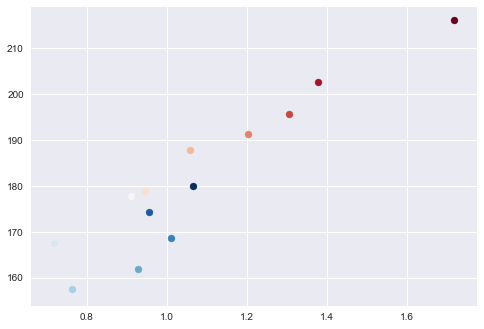

In [14]:
for i in range(len(sim)):
    plt.scatter(nino_var_dec_n3[i],lon_sub[maxi][i],color=colors[i])

plt.show()

In [15]:
print(lon_sub[maxi])

[215.97811028 202.4754918  195.72327589 191.22147342 187.84495693
 178.84026393 177.71461499 167.58322518 157.45101645 161.95430466
 168.70898024 174.33759129 179.96589961]


In [16]:
hbudget_dec_cum=defaultdict(dict)
hbudget_dec_n3w=defaultdict(dict)
hbudget_dec_n3=defaultdict(dict)
hbudget_n3=defaultdict(dict)
hbudget_n3w=defaultdict(dict)
ocean_n3=defaultdict(dict)
ocean_n34=defaultdict(dict)
ocean_n3w=defaultdict(dict)
atmos_n3=defaultdict(dict)
atmos_n34=defaultdict(dict)
atmos_n3w=defaultdict(dict)
mlt_peak=defaultdict(dict)

maxilon=maxi+lon_sub[0]

n3_bounds           = np.squeeze([np.where((lon_sub >= 190 ) & (lon_sub <= 240))])  
n3_bounds_atm       = np.squeeze([np.where((lon_atm_sub >= 165 ) & (lon_atm_sub <= 220))]) 

n34_bounds           = np.squeeze([np.where((lon_sub >= 190 ) & (lon_sub <= 240))]) 
n34_bounds_atm       = np.squeeze([np.where((lon_atm_sub >= 165 ) & (lon_atm_sub <= 220))]) 


for i in range(0,len(sim)):
    


    
    for p in range(0,len(var_ocn_name)):
        ocean_n3[sim[i]][var_ocn_name[p]]=np.reshape(smoothr(np.nanmean(ocean[sim[i]][var_ocn_name[p]][:,n3_bounds[0]:n3_bounds[-1]],axis=1),sm),(time[sim[i]][3],12))
        ocean_n3[sim[i]][var_ocn_name[p]+'_full']=np.reshape(smoothr(np.nanmean(ocean[i][j][:,n3_bounds[0]:n3_bounds[-1]],axis=1),sm),(time[sim[i]][3],12))
   
    for p in range(0,len(var_ocn_name)):
        ocean_n34[sim[i]][var_ocn_name[p]]=np.reshape(smoothr(np.nanmean(ocean[sim[i]][var_ocn_name[p]][:,n34_bounds[0]:n34_bounds[-1]],axis=1),sm),(time[sim[i]][3],12))
        ocean_n34[sim[i]][var_ocn_name[p]+'_full']=np.reshape(smoothr(np.nanmean(ocean[i][j][:,n34_bounds[0]:n34_bounds[-1]],axis=1),sm),(time[sim[i]][3],12))
    
    for p in range(0,len(var_atm_name)):
        atmos_n3[sim[i]][var_atm_name[p]]=np.reshape(smoothr(np.nanmean(atmos[sim[i]][var_atm_name[p]][:,n3_bounds_atm[0]:n3_bounds_atm[-1]],axis=1),sm),(time[sim[i]][3],12))
        atmos_n3[sim[i]][var_atm_name[p]+'_full']=np.reshape(smoothr(np.nanmean(atmos[i][j][:,n3_bounds_atm[0]:n3_bounds_atm[-1]],axis=1),sm),(time[sim[i]][3],12))
    
    for p in range(0,len(var_atm_name)):
        atmos_n34[sim[i]][var_atm_name[p]]=np.reshape(smoothr(np.nanmean(atmos[sim[i]][var_atm_name[p]][:,n34_bounds_atm[0]:n34_bounds_atm[-1]],axis=1),sm),(time[sim[i]][3],12))
        atmos_n34[sim[i]][var_atm_name[p]+'_full']=np.reshape(smoothr(np.nanmean(atmos[i][j][:,n34_bounds_atm[0]:n34_bounds_atm[-1]],axis=1),sm),(time[sim[i]][3],12))
                
    for p in range(0,len(heat_varname)):
        hbudget_n3[sim[i]][heat_varname[p]]=np.reshape(smoothr(np.nanmean(hbudget[sim[i]][heat_varname[p]][:,n3_bounds[0]:n3_bounds[-1]],axis=1),sm),(time[sim[i]][3],12))

    for p in range(0,len(heat_decomp)):
        hbudget_dec_n3[sim[i]][heat_decomp[p]]=np.reshape(smoothr(np.nanmean(hbudget_decomp[sim[i]][heat_decomp[p]][:,n3_bounds[0]:n3_bounds[-1]],axis=1),sm),(time[sim[i]][3],12))                   
        

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: Mean of empty slice
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:34: RuntimeWarning: Mean of empty slice
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: Mean of empty slice
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:45: RuntimeWarning: Mean of empty slice
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: Mean of empty slice


## BARPLOT DECOMP WARM _COLD TOT  GROWTH

In [17]:
colors=plt.cm.gist_ncar(np.linspace(0,1,12))

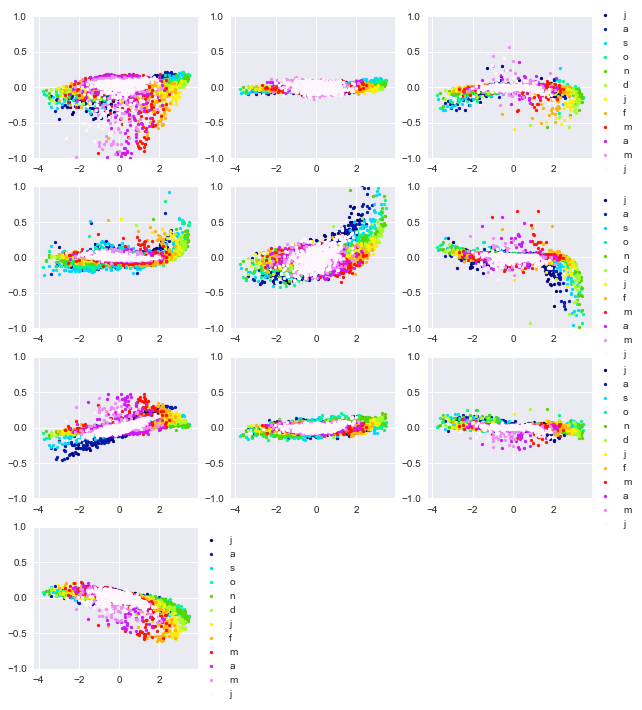

In [18]:
fig = plt.figure(figsize=(10,12))


month=np.roll(['j','f','m','a','m','j','j','a','s','o','n','d'],6)
ax=plt.subplot(4,3,1)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qw_temp'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,2)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qw_curr'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,3)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qw_nl'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1.1))
    ax.set_ylim(-1,1)    
    
ax=plt.subplot(4,3,4)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qu_temp'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,5)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qu_curr'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,6)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qu_nl'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1))
    ax.set_ylim(-1,1)   
    
    
ax=plt.subplot(4,3,7)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qv_temp'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,8)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qv_curr'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,9)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['0ka']['qv_nl'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1))
    ax.set_ylim(-1,1)   
    
ax=plt.subplot(4,3,10)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['0ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_n3['0ka']['qnet'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1))
    ax.set_ylim(-1,1)     
    
    
plt.show()

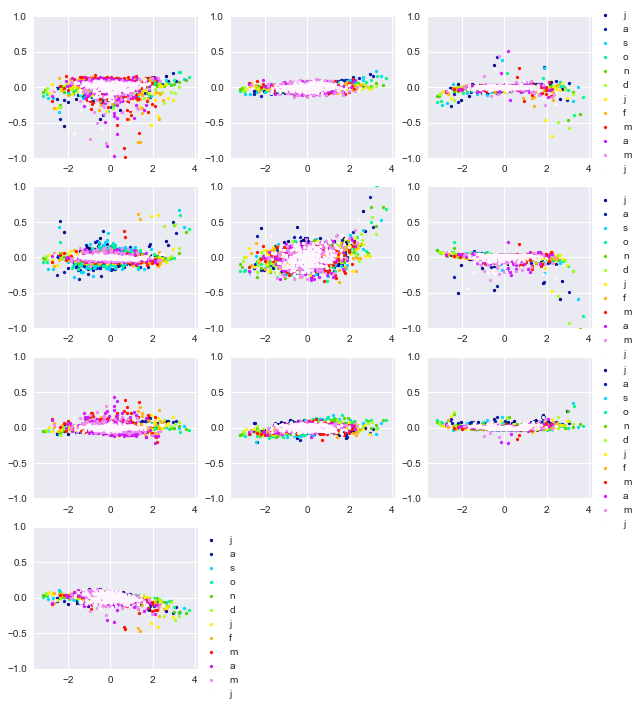

In [19]:
fig = plt.figure(figsize=(10,12))


month=np.roll(['j','f','m','a','m','j','j','a','s','o','n','d'],6)
ax=plt.subplot(4,3,1)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qw_temp'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,2)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qw_curr'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,3)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qw_nl'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1.1))
    ax.set_ylim(-1,1)    
    
ax=plt.subplot(4,3,4)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qu_temp'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,5)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qu_curr'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,6)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qu_nl'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1))
    ax.set_ylim(-1,1)   
    
    
ax=plt.subplot(4,3,7)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qv_temp'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,8)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qv_curr'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.set_ylim(-1,1)
    
ax=plt.subplot(4,3,9)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_dec_n3['24ka']['qv_nl'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1))
    ax.set_ylim(-1,1)   
    
ax=plt.subplot(4,3,10)
for i in range(12):
    ax.scatter(np.roll(ocean_n3['24ka']['TavgML'],6,axis=1)[:,i],np.roll(hbudget_n3['24ka']['qnet'],6,axis=1)[:,i],label=month[i],s=9,c=colors[i])
    ax.legend(loc=9,bbox_to_anchor=(1.13, 1))
    ax.set_ylim(-1,1)     
    
    
plt.show()

In [20]:


reg={}
corr={}


for simi in sim: 
    reg['sl_'+simi]=np.zeros([12])
    reg['sl_'+simi+'2']=np.zeros([12])
    reg['sl_'+simi+'3']=np.zeros([12])

    corr['sl_'+simi]=np.zeros([12])
    corr['sl_'+simi+'2']=np.zeros([12])
    corr['sl_'+simi+'3']=np.zeros([12])

    mm=0
    nmonth=3
    indice=[11,0,1,2,3,4,5,6,7,8,9,10,11]
    indice=np.roll(indice,mm)
    labels=np.roll(['j','f','m','a','m','j','j','a','s','o','n','d'],mm)


    for i in range(12): 
        ind=np.roll(indice,-i)[0:nmonth]
        x1_cont=(ocean_n3[simi]['tos'][:,ind])
        x1_cont=np.reshape(x1_cont,(len(x1_cont)*nmonth))
        real=x1_cont > 0.1
        x1_cont=x1_cont[real]
        y1_cont=((hbudget_dec_n3[simi]['qw_curr']+hbudget_dec_n3[simi]['qu_curr']\
                  )[:,ind])
        y1_cont=np.reshape(y1_cont,(len(y1_cont)*nmonth))
        y1_cont=y1_cont[real]


        sl1_cont, intercept, r_val1, p_value, std_err1 = linregress(x1_cont,y1_cont)    
        reg['sl_'+simi][i]=sl1_cont
        corr['sl_'+simi][i]=r_val1    
        # ----
        y2_cont=(-atmos_n3[simi]['tauu'][:,ind]) 
        y2_cont=np.reshape(y2_cont,(len(y2_cont)*nmonth))
        y2_cont=y2_cont[real]
        real2=y2_cont <0.08

        sl2_cont, intercept, r_val2, p_value, std_err2 = linregress(x1_cont[real2],y2_cont[real2])
        reg['sl_'+simi+'2'][i]=sl2_cont
        corr['sl_'+simi+'2'][i]=r_val2
        # ----
        sl3_cont, intercept, r_val3, p_value, std_err3 = linregress(y2_cont[real2], y1_cont[real2])
        reg['sl_'+simi+'3'][i]=sl3_cont
        corr['sl_'+simi+'3'][i]=r_val3

    # sl1_cont,sl2_cont*sl3_cont, sl2_cont, sl3_cont

In [21]:
# reg['sl_cont4']=np.zeros([12])
# month=[12,1,2,3,4,5,6,7,8,9,10,11,12,1,2]
# xx=ocean_n3['0ka']['tos']
# xx=np.reshape(xx,(len(xx)*12))

# yy=-atmos_n3['0ka']['tauu']
# yy=np.reshape(yy,(len(yy)*12))
# for j in range(12):
#     ind1=np.squeeze(np.where(xx > 0))
#     ind2=np.squeeze(np.where(yy[ind1] < 0.04))
#     ind3=(time[0][1][ind1[ind2]] == month[j]) ^\
#          (time[0][1][ind1[ind2]] == month[j+1]) ^\
#          (time[0][1][ind1[ind2]] == month[j+2])

#     m, b, r_value, p_value, std_err = linregress(xx[ind1[ind2[ind3]]],yy[ind1[ind2[ind3]]])
#     reg['sl_cont4'][j]=m

In [22]:
reghov=defaultdict(dict)
corrhov=defaultdict(dict)


for simu in sim: 

    reghov[simu+'']=np.zeros([12,nlon])      # Reg (Tos - Qu_curr + Qw_curr) = BJ 
    reghov[simu+'2']=np.zeros([12,nlon_atm]) # Reg (Taux - tos )= ATM BJ  
    reghov[simu+'3']=np.zeros([12,nlon])     # Reg (Qu_curr + Qw_curr - Taux ) = OCN BJ 
    reghov[simu+'4']=np.zeros([12,nlon])     # Sdev Tos 
    reghov[simu+'5']=np.zeros([12,nlon])     # Reg uos _ taux 
    reghov[simu+'6']=np.zeros([12,nlon])     # Reg Tos - Qnet = DAMPING 
    reghov[simu+'7']=np.zeros([12,nlon_atm]) # SDEV Taux 
    reghov[simu+'8']=np.zeros([12,nlon])     # reg uos _ Qu_curr 
    
    # --------------------------------------- 
    corrhov[simu+'']=np.zeros([12,nlon])
    corrhov[simu+'2']=np.zeros([12,nlon_atm])
    corrhov[simu+'3']=np.zeros([12,nlon])
    # --------------------------------------- 
    nt=len(ocean[simu]["tos"])
    # ---------------------------------------

    mm=0
    nmonth=3
    indice=[11,0,1,2,3,4,5,6,7,8,9,10,11]
    indice=np.roll(indice,mm)
    labels=np.roll(['j','f','m','a','m','j','j','a','s','o','n','d'],mm)

    varatm=np.reshape(-atmos[simu]["tauu"],[int(time[simu][3]),12,nlon_atm])
    varoce=np.reshape(ocean[simu]["tos"],[int(time[simu][3]),12,nlon])
    varoce2=np.reshape(ocean[simu]["uos"],[int(time[simu][3]),12,nlon])
    varhb=np.reshape(hbudget_decomp[simu]['qu_curr']+hbudget_decomp[simu]['qw_curr']\
                     +hbudget_decomp[simu]['qv_temp']+hbudget_decomp[simu]['qu_temp']\
                     ,[int(time[simu][3]),12,nlon])
    
    varhb2=np.reshape(hbudget[simu]['qnet']+hbudget_decomp[simu]['qu_nl']\
                      +hbudget_decomp[simu]['qv_nl'],[int(time[simu][3]),12,nlon])
    
    varhb3=np.reshape(hbudget_decomp[simu]['qu_curr'],[int(time[simu][3]),12,nlon])

  

    for i in range(12): 
        ind=np.roll(indice,-i)[0:nmonth]
        x1_cont2=np.squeeze((ocean_n3[simu+'']['tos'][:,ind]))
        x1_cont2=np.reshape(x1_cont2,(len(x1_cont2)*nmonth))
        
        x1_cont34=np.squeeze((ocean_n34[simu+'']['tos'][:,ind]))
        x1_cont34=np.reshape(x1_cont34,(len(x1_cont34)*nmonth))
        
        yy1_cont=(-atmos_n3[simu+'']['tauu'][:,ind])
        yy1_cont=np.reshape(yy1_cont,(len(yy1_cont)*nmonth))

        yy34_cont=(-atmos_n34[simu+'']['tauu'][:,ind])
        yy34_cont=np.reshape(yy34_cont,(len(yy34_cont)*nmonth))
        
        nino2=(x1_cont2 > 0)
        x1_cont2=x1_cont2[nino2]      
        
        for x in range(nlon):
            x1_cont=np.squeeze(varoce[:,ind,x])
            x1_cont=np.reshape(x1_cont,(len(x1_cont)*nmonth))
            indvaratm=np.squeeze(np.where((lon_atm_sub > lon_sub[x]-10) & (lon_atm_sub < lon_sub[x])))
            if indvaratm.size > 1:
                test_atm=np.nanmean(varatm[:,ind,:][:,:,indvaratm],axis=2)
            else: 
                test_atm=varatm[:,ind,:][:,:,indvaratm]
            test_atm=np.reshape(test_atm,(len(test_atm)*nmonth))
            

            nino=(x1_cont> 0) & (test_atm < 0.1)
            x1_cont=x1_cont[nino]
            
            y1_cont=np.squeeze(varhb[:,ind,x])
            y1_cont=np.reshape(y1_cont,(len(y1_cont)*nmonth))
            y1_cont=y1_cont[nino]
            
            sl1_cont, intercept, r_val1, p_value, std_err1 = linregress(x1_cont[~np.isnan(x1_cont)], y1_cont[~np.isnan(x1_cont)])    
            
            reghov[simu+'4'][i,x]=np.std(varoce[:,ind,x][~np.isnan(varoce[:,ind,x])])
            reghov[simu+''][i,x]=sl1_cont
            corrhov[simu+''][i,x]=r_val1  
           
            y1_cont=np.squeeze(varhb[:,ind,x])
            y1_cont=np.reshape(y1_cont,(len(y1_cont)*nmonth))
            y1_cont=y1_cont[nino]
            yyy1_cont=yy1_cont[nino]
            sl3_cont, intercept, r_val3, p_value, std_err3 = linregress(yyy1_cont[~np.isnan(x1_cont)], y1_cont[~np.isnan(x1_cont)])
            reghov[simu+'3'][i,x]=sl3_cont
            corrhov[simu+'3'][i,x]=r_val3
            
            
            y1_cont=np.squeeze(varhb3[:,ind,x])
            y1_cont=np.reshape(y1_cont,(len(y1_cont)*nmonth))
            y1_cont=y1_cont[nino]
            
            xx_uos=np.squeeze(varoce2[:,ind,x])
            xx_uos=np.reshape(xx_uos,(len(xx_uos)*nmonth))
            xx_uos=xx_uos[nino]
            
            sl8_cont, intercept, r_val3, p_value, std_err3 = linregress(xx_uos[~np.isnan(x1_cont)], y1_cont[~np.isnan(x1_cont)])
            reghov[simu+'8'][i,x]=sl8_cont
            corrhov[simu+'8'][i,x]=r_val3            
            
            
            y1_cont=np.squeeze(varoce2[:,ind,x])
            y1_cont=np.reshape(y1_cont,(len(y1_cont)*nmonth))
            y1_cont=y1_cont[nino]
            sl4_cont, intercept, r_val4, p_value, std_err3 = linregress(yyy1_cont[~np.isnan(x1_cont)], y1_cont[~np.isnan(x1_cont)])
            reghov[simu+'5'][i,x]=sl4_cont
                
            y1_cont=np.squeeze(varhb2[:,ind,x])
            y1_cont=np.reshape(y1_cont,(len(y1_cont)*nmonth))
            y1_cont=y1_cont[nino]
            sl4_cont, intercept, r_val3, p_value, std_err3 = linregress(x1_cont[~np.isnan(x1_cont)], y1_cont[~np.isnan(x1_cont)])
            reghov[simu+'6'][i,x]=sl4_cont
            corrhov[simu+'6'][i,x]=r_val3
            
            
        # ----
        for x in range(nlon_atm):
            y2_cont=np.squeeze(varatm[:,ind,x])  
            reghov[simu+'7'][i,x]=np.std(y2_cont[~np.isnan(y2_cont)])
            
            y2_cont=np.reshape(y2_cont,(len(y2_cont)*nmonth))
            y2_cont=y2_cont[nino2]
            sl2_cont, intercept, r_val2, p_value, std_err2 = linregress(x1_cont2,y2_cont )
            reghov[simu+'2'][i,x]=sl2_cont
            corrhov[simu+'2'][i,x]=r_val2
        # ----

In [23]:
bf_hov_ts=np.zeros([len(sim),nlon])
abf_hov_ts=np.zeros([len(sim),nlon_atm])
obf_hov_ts=np.zeros([len(sim),nlon])
damping_hov=np.zeros([len(sim),nlon])


tssdev_hov_ts=np.zeros([len(sim),nlon])
upertx=np.zeros([len(sim),nlon])
qperu=np.zeros([len(sim),nlon])


# indic=[5,6,7,8,9,10]
indic=[5,6,7,8,9,10,11]

indic2=indic
for i in range(len(sim)):
    bf_hov_ts[i,:]=np.nanmean(reghov[sim[i]][indic,:],axis=0)
    abf_hov_ts[i,:]=np.nanmean(reghov[sim[i]+'2'][indic,:],axis=0)
    obf_hov_ts[i,:]=np.nanmean(reghov[sim[i]+'3'][indic,:],axis=0)

#     tssdev_hov_ts[i,:]=np.nanmean(reghov[sim[i]+'4'][[11,0,1],:],axis=0)
    tssdev_hov_ts[i,:]=np.nanmean(reghov[sim[i]+'4'][[10,11,9],:],axis=0)

    upertx[i,:]=np.nanmean(reghov[sim[i]+'5'][indic,:],axis=0)
    
    qperu[i,:]=np.nanmean(reghov[sim[i]+'8'][indic,:],axis=0)
    
    damping_hov[i,:]=np.nanmean(reghov[sim[i]+'6'][indic2,:],axis=0)

No handles with labels found to put in legend.


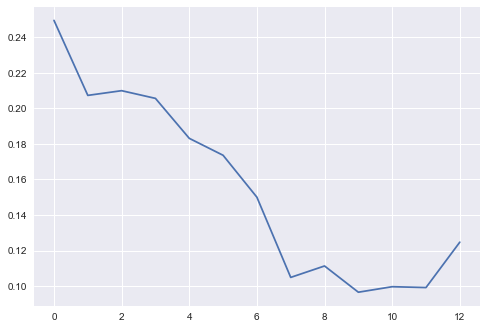

In [24]:
plt.plot(np.nanmean(bf_hov_ts,axis=1))
# plt.plot(np.nanmean(bf_hov_ts2,axis=1),label='2')

plt.legend()
plt.show()

In [25]:
sm=1
ocean_n4=defaultdict(dict)
atmos_n4=defaultdict(dict)

for ll in np.arange(10)*10+140:

    n4_atm     = np.squeeze([np.where((lon_atm_sub >= ll ) & (lon_atm_sub <= ll+20))]) 
    n4         = np.squeeze([np.where((lon_sub >= ll ) & (lon_sub <= ll+20))]) 

    for i in range(0,len(sim)):

        for p in range(0,len(var_ocn_name)):
            ocean_n4[sim[i]][var_ocn_name[p]+str(ll)]=np.reshape(smoothr(np.nanmean(ocean[i][j][:,n4[0]:n4[-1]],axis=1),sm),(time[sim[i]][3],12))

        for p in range(0,len(var_atm_name)):
            atmos_n4[sim[i]][var_atm_name[p]+str(ll)]=np.reshape(smoothr(np.nanmean(atmos[sim[i]][var_atm_name[p]][:,n4_atm[0]:n4_atm[-1]],axis=1),sm),(time[sim[i]][3],12))



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: Mean of empty slice


In [26]:
# # CONVECTIVE THRESHOLD 

# exp='24ka'
# wp=24.4
# # -----------------------------------------------------------------------
# for ll in np.arange(10)*10+140:
#     x=np.nanmean(ocean_n4[exp]['tos'+str(ll)][:,6:9],axis=1)
#     y=np.nanmean(-atmos_n4[exp]['tauu'+str(ll)][:,6:9],axis=1)
# #     p=np.polyfit(x,y,deg)
#     plt.scatter(x,y,s=6)
#     plt.plot([wp,wp],[-0.04,0.04],color='k')
    
# ind=np.squeeze(np.where(np.nanmean(np.nanmean(ocean[exp]['tos_full'][:,6:9,:],axis=1),axis=0) > wp+0.5))
# print(lon_sub[ind[-1]])
    
# tt=[26.3,25.7,25.1,24.7,23.7]

# plt.show()

In [27]:
# WPEE computation
wpee=np.zeros(len(sim))
inc=0
for i in sim: 
    ind=np.where(np.nanmean(np.nanmean(atmos[i]['pr_full'][:,6:9,:],axis=1),axis=0)*86400*1000 > 3.8)
    wpee[inc]=lon_atm_sub[ind[0][-1]]
    inc=inc+1

    
wpee3=np.zeros(len(sim))
inc=0
for i in sim: 
    ind=np.where(np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,6:9,:],axis=1),axis=0)[0:30] > -0.028)
    wpee3[inc]=lon_atm_sub[ind[0][-1]]
    inc=inc+1

# WPEE computation 2 
wpee2=np.zeros(len(sim))
# ts_wpee=[28,27,27,26.8,26.8,27.4,26.5,25.9,25.7,25,24.7,24.3,24.1]
ts_wpee=[28,27,27,26.8,26.8,27.4,26.5,25.9,26.3,25.7,25.1,24.7,24.4]


inc=0
for i in sim: 
    ind=np.squeeze(np.where(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:10,:],axis=1),axis=0) > ts_wpee[inc]+0.5))
    wpee2[inc]=lon_sub[ind[-1]]
    inc=inc+1
    
wpeem=(wpee+wpee2)/2

In [28]:
# concatene mixed layer hovmoeller 
mld_hov=np.zeros([len(sim),nlon])
mld_hov2=np.zeros([len(sim),nlon])
inc=0
for i in sim: 
    mld_hov[inc,:]=mld[i]
    mld_hov2[inc,:]=mld[i+'2']
    inc=inc+1


In [29]:
# Compute El Niño composite 
nino_hov=np.zeros([len(sim),nlon])
nino_tx_hov=np.zeros([len(sim),nlon_atm])
inc=0
for i in sim: 
    nino_ind=np.squeeze(np.where(np.nanmean(ocean_n3[i]['tos'][:,[10,11]],axis=1)/\
                      np.nanmean(ocean_n3[i]['tos'][:,[10,11]],axis=1).std() > 1))
    
    var=np.reshape(ocean[i]['tos'],(time[i][3],12,nlon))
    
    nino_hov[inc,:]=np.nanmean(np.nanmean(var[nino_ind,10:12,:],axis=0).squeeze(),axis=0)
    
    var=np.reshape(-atmos[i]['tauu'],(time[i][3],12,nlon_atm))
    nino_tx_hov[inc,:]=np.nanmean(np.nanmean(var[nino_ind,8:11,:],axis=0).squeeze(),axis=0)
    
    inc=inc+1

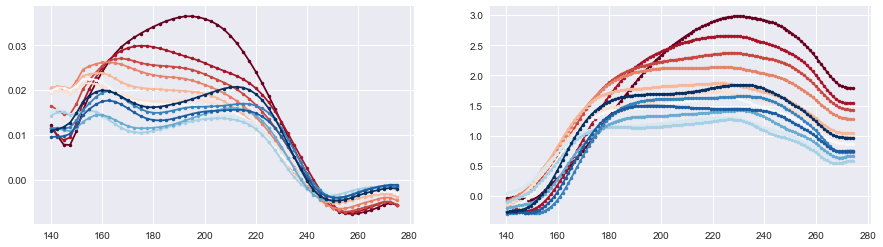

In [30]:
fig, axi = plt.subplots(1,2,figsize=(15,4))
colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))
inc=0
for i in range(len(sim)):
    axi[0].plot(lon_atm_sub,nino_tx_hov[i,:],color=colors[i],marker='.')
    
for i in range(len(sim)):
    axi[1].plot(lon_sub,nino_hov[i,:],color=colors[i],marker='.')
    
    
plt.show()

In [31]:
# COMPUTE ZONAL SST GRADIENT.
DTdxbar=np.zeros([len(sim),nlon])
inc=0
for i in sim: 
    DTdxbar[inc,:]= np.gradient(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0))
    inc=inc+1

In [63]:
# create time axis in function of lag 
base = datetime(2000, 1, 1)
arr = np.array([base + relativedelta(days=i) for i in sim_time])
plt_dates = mdates.date2num(arr)

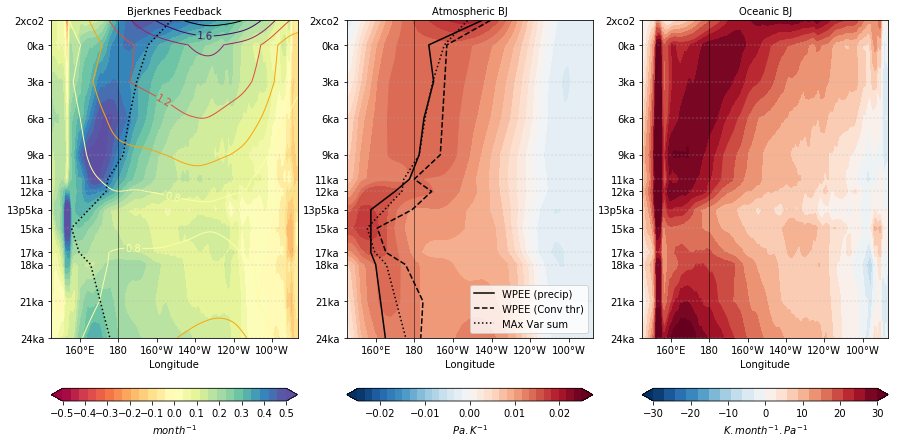

In [198]:
fig, axi = plt.subplots(1,3,figsize=(15,7))

data_cont={}
data_cont["data"]=tssdev_hov_ts
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=bf_hov_ts,direction='x',ax=axi[0],fig=fig,\
       vmin=-0.5,title='Bjerknes Feedback',cb_int=0.1,\
           contourf=False,ncont=26,cb_label=r"$month^{-1}$",\
           cfmt="%.1f",cmap='Spectral',nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,\
           data_cont=data_cont,clevel=np.arange(0.8,2,0.2),fsclabel=10,\
           clinewidth=1,cont_cmap='inferno_r',zoom=[145,280])
axi[0].plot(maxilon,plt_dates,color='k',linestyle=':',label='MAx Var sum ')



hovmoeller(x=lon_atm_sub,y=plt_dates,data=abf_hov_ts,direction='x',ax=axi[1],fig=fig,\
       vmin=-0.025,title='Atmospheric BJ',cb_int=0.01,\
           contourf=False,ncont=30,cb_label=r"$Pa.K^{-1}$",\
           cfmt="%.1f",cont_cmap='inferno_r',nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,clevel=np.arange(0.8,1.5,0.05),zoom=[145,280])

axi[1].plot(wpee,plt_dates,color='k',linestyle='-',label='WPEE (precip)')
axi[1].plot(wpee2,plt_dates,color='k',linestyle='--',label='WPEE (Conv thr)')
# axi[1].plot(wpee3,plt_dates,color='k',linestyle=':',label='WPEE (Lim tradW)')
# axi[1].plot(wpeem,plt_dates,color='k',linestyle='-.',label='WPEE (avg)')
axi[1].plot(maxilon,plt_dates,color='k',linestyle=':',label='MAx Var sum ')



axi[1].legend(loc=4)

data_cont={}
data_cont["data"]=mld_hov2
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=obf_hov_ts,direction='x',ax=axi[2],fig=fig,\
       vmin=-30,title='Oceanic BJ',cb_int=10,\
           contourf=False,ncont=20,cb_label=r"$K.month^{-1}.Pa^{-1}$",\
           cfmt="%d",cont_cmap='inferno_r',nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,clevel=np.arange(70,100,5)\
           ,data_cont2=data_cont,fsclabel=10,clinewidth=1,step_clabel=1,zoom=[145,280])
# axi[2].plot(maxilon,plt_dates,color='k',linestyle=':',label='MAx Var sum ')


mpl.rc('pdf', fonttype=42)
plt.savefig('BJ_feedback_time_slices.pdf', bbox_inches='tight')



plt.show()   

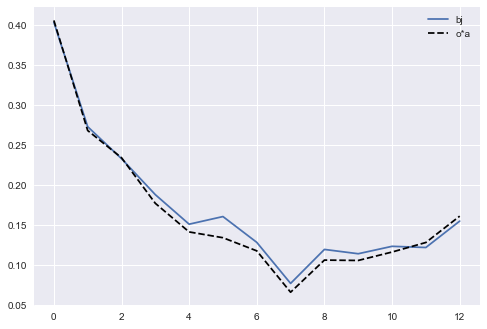

[[1.         0.99555166]
 [0.99555166 1.        ]]


In [34]:
indlon34=np.squeeze(np.where((lon_sub > 192) & (lon_sub < 240)))
indlon34_atm=np.squeeze(np.where((lon_atm_sub > 155) & (lon_atm_sub < 220)))

indlon342=np.squeeze(np.where((lon_sub > 200) & (lon_sub < 240)))



bf_hov_ts_n34=np.nanmean(bf_hov_ts[:,indlon34],axis=1)
obf_hov_ts_n34=np.nanmean(obf_hov_ts[:,indlon34],axis=1)
abf_hov_ts_n34=np.nanmean(abf_hov_ts[:,indlon34_atm],axis=1)
damp_hov_ts_n34=np.nanmean(damping_hov[:,indlon342],axis=1)
tssdev_hov_ts_n34=np.nanmean(tssdev_hov_ts[:,indlon],axis=1)

plt.plot(bf_hov_ts_n34,label='bj')


# plt.plot(bf_hov_ts_n34+damp_hov_ts_n34,label='bj+damp')
plt.plot(obf_hov_ts_n34*abf_hov_ts_n34,label='o*a',color='k',linestyle='--')
# plt.plot(-damp_hov_ts_n34,label='damp')
# plt.plot(tssdev_hov_ts_n34/10+0.02)




plt.legend()
plt.show()

print(np.corrcoef(obf_hov_ts_n34*abf_hov_ts_n34,bf_hov_ts_n34))

In [35]:
# np.load('outfile_df_xxx.npy')

df = pd.read_pickle('outfile_df')

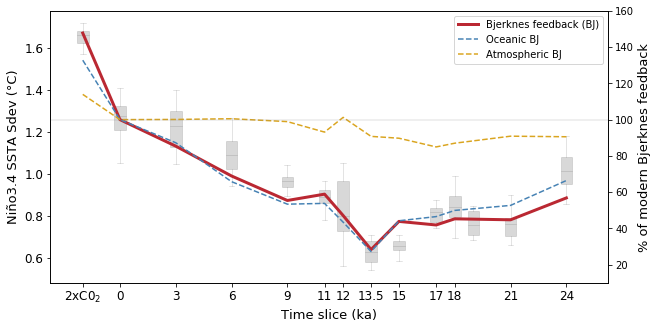

In [36]:
colors=plt.cm.RdBu(np.linspace(0,1,50))

sns.reset_orig()

pal=sns.color_palette("RdBu", len(sim_time))
sns.set_palette(pal)   

fig, ax2 = plt.subplots(figsize=[10,5])


# ---------------------------------------------------------------------------------------------------------

# ax2 = plt.subplot(2,2,2)

xasc=np.arange(27*2.2)*0.5-3.5
# sns.boxplot(x="x", y="y", data=df, order=xasc,ax=ax2,whis=1.5,width=1.7,palette="RdBu",linewidth=1.25,fliersize=0)
sns.boxplot(x="x", y="y", data=df, order=xasc,ax=ax2,whis=1.5,width=1.25,\
            color='grey',linewidth=1.25,fliersize=0, boxprops=dict(alpha=.3,linewidth=0.5),\
            medianprops=dict(alpha=.3,linewidth=0.5),whiskerprops=dict(alpha=.3,linewidth=0.5),capprops=dict(alpha=.3,linewidth=0.5))

# sns.swarmplot(x="x", y="y",data=df, order=xasc,ax=ax2, color=".25",s=2)

ax2.set_ylabel("Niño3.4 SSTA Sdev (°C)",fontsize=13)
ax2.set_xlabel("Time slice (ka)",fontsize=13)
loci=sim_time
loci[0]=-2
xasc_pos=[np.squeeze(np.where(xasc == i)) for i in loci]
ax2.set_xticks(xasc_pos)
time_slices2=np.copy(sim_time)
time_slices2=[str(i) for i in sim_time]
time_slices2[0]=r"2xC$0_{2}$"
ax2.set_xticklabels((time_slices2),fontsize=12)
ax2.tick_params(labelsize=12)

# ax2.grid(linestyle='--',linewidth=0.05,zorder=-1)


ax2.xaxis.grid(False)


par1 = ax2.twinx()
p3, = par1.plot(xasc_pos,bf_hov_ts_n34/bf_hov_ts_n34[1]*100,color=colors[6], label="Bjerknes feedback (BJ)",linewidth=3,)
p2, = par1.plot(xasc_pos,obf_hov_ts_n34/obf_hov_ts_n34[1]*100,color='steelblue', label="Oceanic BJ",linewidth=1.5,linestyle='--')
p4, = par1.plot(xasc_pos,abf_hov_ts_n34/abf_hov_ts_n34[1]*100,color='goldenrod', label="Atmospheric BJ",linewidth=1.5,linestyle='--')
# p2, = par1.plot(xasc_pos,abf_hov_ts_n34/abf_hov_ts_n34[1]*obf_hov_ts_n34/obf_hov_ts_n34[1],\
#                 color='k',linestyle='--', label="Atmospheric BJ",)
par1.plot([-10,10000],[100,100],linewidth=0.25,color='grey')



par1.set_ylim(10,160)
par1.set_ylabel('% of modern Bjerknes feedback',fontsize=13)
mpl.rc('pdf', fonttype=42)

plt.legend()
plt.savefig('ENSO_TIME_SLICE_PROJECT_FIGURE_3.pdf', bbox_inches='tight')

plt.show()

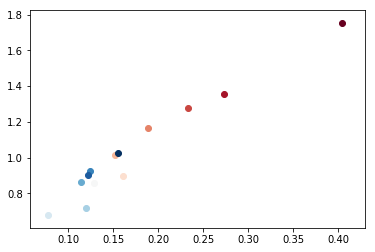

array([[1.        , 0.97455897],
       [0.97455897, 1.        ]])

In [37]:
colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))
for i in range(len(sim)): 
    plt.scatter(bf_hov_ts_n34[i],tssdev_hov_ts_n34[i],color=colors[i] )

plt.show()

np.corrcoef(bf_hov_ts_n34,tssdev_hov_ts_n34)

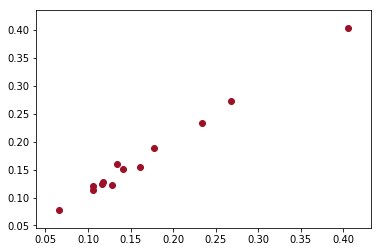

array([[1.        , 0.99555166],
       [0.99555166, 1.        ]])

In [38]:
plt.scatter(obf_hov_ts_n34*abf_hov_ts_n34,bf_hov_ts_n34)

plt.show()
np.corrcoef(obf_hov_ts_n34*abf_hov_ts_n34,bf_hov_ts_n34)

In [39]:
data={}
data['BJ']=bf_hov_ts
data['lon']=lon_sub
data['time_slices']=sim

np.save('kau_bj_file',data)
test=np.load('kau_bj_file.npy').item()

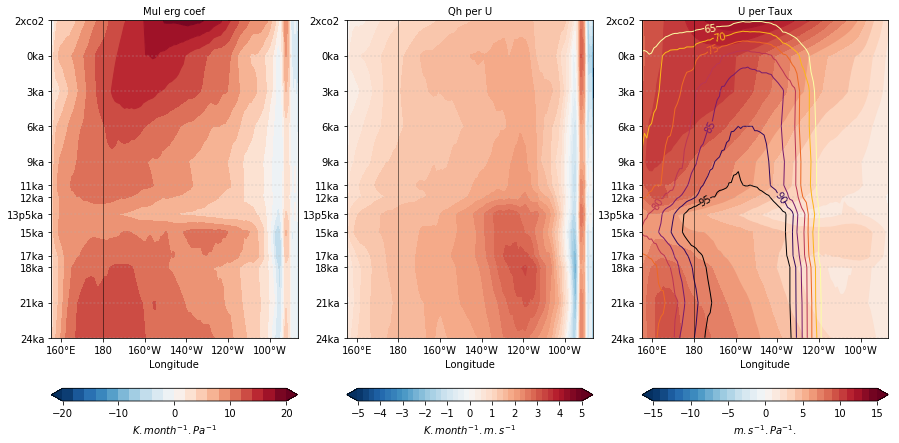

In [40]:
fig, axi = plt.subplots(1,3,figsize=(15,7))

data_cont={}
data_cont["data"]=tssdev_hov_ts
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

# data_cont={}
# data_cont["data"]=nino_tx_hov
# data_cont["lon"]=lon_atm_sub
# data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=qperu*upertx,direction='x',ax=axi[0],fig=fig,\
       vmin=-20,title='Mul erg coef',cb_int=10,\
           contourf=False,ncont=20,cb_label=r"$K.month^{-1}.Pa^{-1}$",\
           cfmt="%.3f",nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,zoom=[155,280],\
           clevel=np.arange(0.005,0.03,0.0025),fsclabel=10,\
           clinewidth=1.25,cont_cmap='inferno_r')

# axi[0].plot(wpee,plt_dates,color='k',linestyle='-',label='WPEE (precip)')
# axi[0].plot(wpee2,plt_dates,color='k',linestyle='--',label='WPEE (Conv thr)')
# axi[1].plot(wpee3,plt_dates,color='k',linestyle=':',label='WPEE (Lim tradW)')
# axi[0].plot(wpeem,plt_dates,color='k',linestyle='-.',label='WPEE (avg)')


hovmoeller(x=lon_sub,y=plt_dates,data=qperu,direction='x',ax=axi[1],fig=fig,\
       vmin=-5,title='Qh per U',cb_int=1,\
           contourf=False,ncont=40,cb_label=r"$K.month^{-1}.m.s^{-1}$",\
           cfmt="%.3f",nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,zoom=[155,280],\
           clevel=np.arange(0.8,1.5,0.1),fsclabel=10,\
           clinewidth=1.25,cont_cmap='inferno_r')


# axi[1].plot(wpee,plt_dates,color='k',linestyle='-',label='WPEE (precip)')
# axi[1].plot(wpee2,plt_dates,color='k',linestyle='--',label='WPEE (Conv thr)')
# axi[1].plot(wpee3,plt_dates,color='k',linestyle=':',label='WPEE (Lim tradW)')
# axi[1].plot(wpeem,plt_dates,color='k',linestyle='-.',label='WPEE (avg)')

# axi[1].legend(loc=4)

data_cont={}
data_cont["data"]=mld_hov2
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=upertx,direction='x',ax=axi[2],fig=fig,\
       vmin=-15,vmax=15,title='U per Taux',cb_int=5,\
           contourf=False,ncont=30,cb_label=r"$m.s^{-1}.Pa^{-1}.$",\
           cfmt="%.0d",nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,zoom=[155,280],\
           cont_cmap='inferno_r',data_cont=data_cont,fsclabel=10,\
           clinewidth=1,step_clabel=1,clevel=np.arange(65,100,5))


# axi[2].plot(wpeem,plt_dates,color='k',linestyle='-.',label='WPEE (avg)')
mpl.rc('pdf', fonttype=42)
plt.savefig('BJ_feedback_time_slices_OCESNIC_DECOMP.pdf', bbox_inches='tight')

plt.show()   

In [107]:
hov_tauu=[]
for simu in sim: 
    varatm=np.nanmean(np.nanmean(np.reshape(-atmos[simu]["tauu_full"],[int(time[simu][3]),12,nlon_atm]),axis=0),axis=0)
    hov_tauu.extend([varatm])
hov_tauu=np.array(hov_tauu)  

//anaconda/lib/python3.5/site-packages/matplotlib/gridspec.py:314: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


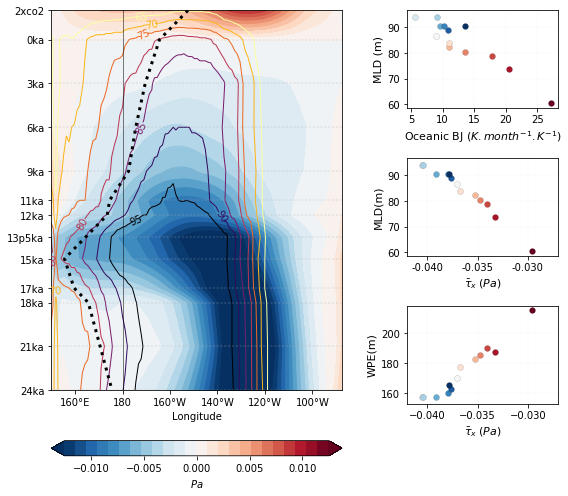

In [201]:
fig = plt.figure(figsize=(10,7))


# gs0 = gridspec.GridSpec(1, 2,width_ratios=[1, 1])

gs1 = gridspec.GridSpec(1, 1)
ax0 = fig.add_subplot(gs1[0])


# gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0])
# gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])

# ax0=plt.subplot(gs00[:, :])

data_cont={}
data_cont["data"]=mld_hov2
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_atm_sub,y=plt_dates,data=hov_tauu-hov_tauu[1,:],direction='x',ax=ax0,fig=fig,\
       vmin=-0.0125,vmax=0.0125,title='',cb_int=0.005,\
           contourf=False,ncont=24,cb_label=r"$Pa$",\
           cfmt="%.0d",nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,zoom=[150,280],\
           cont_cmap='inferno_r',data_cont=data_cont,fsclabel=10,\
           clinewidth=1,step_clabel=1,clevel=np.arange(65,100,5))

ax0.plot(maxilon,plt_dates,color='k',linestyle=':',linewidth=3)



tauu_mean=np.zeros([len(sim)])
inc=0
for i in sim: 
    tauu_mean[inc]=np.nanmean(-atmos[i]['tauu_full'][:,:,:])
    inc=inc+1
    
ind           = np.squeeze([np.where((lon_sub >= 192 ) & (lon_sub <= 240))]) 
ind2           = np.squeeze([np.where((lon_sub >= 150 ) & (lon_sub <= 240))]) 
ind_atm       = np.squeeze([np.where((lon_atm_sub >= 192 ) & (lon_atm_sub <= 240))]) 


# ax1=plt.subplot(gs01[0])
# ax2=plt.subplot(gs01[1])
# ax3=plt.subplot(gs01[2])
gs2 = gridspec.GridSpec(3, 1)
ax1 = fig.add_subplot(gs2[0])
ax2 = fig.add_subplot(gs2[1])
ax3 = fig.add_subplot(gs2[2])

ax1.grid(linestyle='-', linewidth='0.1', color='grey',alpha=0.3,zorder=-1)
ax2.grid(linestyle='-', linewidth='0.1', color='grey',alpha=0.3,zorder=-1)
ax3.grid(linestyle='-', linewidth='0.1', color='grey',alpha=0.3,zorder=-1)
# -------- 
inc=0
for i in sim: 
    
    ax1.scatter(np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],np.nanmean(mld_hov2[:,ind2],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    ax2.scatter(tauu_mean[inc],np.nanmean(mld_hov2[:,ind2],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    ax3.scatter(tauu_mean[inc],wpee[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )



    inc=inc+1
ax1.set_xlabel(r'Oceanic BJ ($K.month^{-1}.K^{-1}$)',fontsize=11)
ax1.set_ylabel('MLD (m)',fontsize=11)

ax2.set_xlabel(r'$\bar \tau _x \; (Pa)$',fontsize=11)
ax2.set_ylabel('MLD(m)',fontsize=11)

ax3.set_xlabel(r'$\bar \tau _x \; (Pa)$',fontsize=11)
ax3.set_ylabel('WPE(m)',fontsize=11)


ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))







ax2.set_xlim(-0.042,-0.027)
ax3.set_xlim(-0.042,-0.027)

# top = min(gs1.top, gs2.top)
# bottom = max(gs1.bottom, gs2.bottom)

# gs1.update(top=top, bottom=bottom)
# gs2.update(top=top, bottom=bottom)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])
gs2.tight_layout(fig, rect=[0.5, 0.1, 0.8, 1],h_pad=1)
# gs1.tight_layout(fig, rect=[None, 0 + (bottom-gs1.bottom), 0.5, 1 - (gs1.top-top)])
# gs2.tight_layout(fig, rect=[0.5, 0 + (bottom-gs2.bottom), None, 1 - (gs2.top-top)],h_pad=0.5)

mpl.rc('pdf', fonttype=42)
plt.savefig('ENSO_time_slice_fig.pdf', bbox_inches='tight')


# axi[2].plot(wpeem,plt_dates,color='k',linestyle='-.',label='WPEE (avg)')
# mpl.rc('pdf', fonttype=42)
# plt.savefig('BJ_feedback_time_slices_OCESNIC_DECOMP.pdf', bbox_inches='tight')

plt.show()   

//anaconda/lib/python3.5/site-packages/matplotlib/gridspec.py:314: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


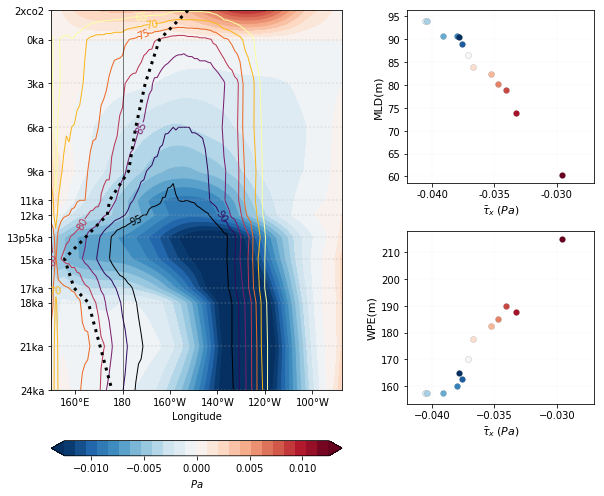

In [205]:
fig = plt.figure(figsize=(10,7))


# gs0 = gridspec.GridSpec(1, 2,width_ratios=[1, 1])

gs1 = gridspec.GridSpec(1, 1)
ax0 = fig.add_subplot(gs1[0])


# gs00 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0])
# gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])

# ax0=plt.subplot(gs00[:, :])

data_cont={}
data_cont["data"]=mld_hov2
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_atm_sub,y=plt_dates,data=hov_tauu-hov_tauu[1,:],direction='x',ax=ax0,fig=fig,\
       vmin=-0.0125,vmax=0.0125,title='',cb_int=0.005,\
           contourf=False,ncont=24,cb_label=r"$Pa$",\
           cfmt="%.0d",nocolorbar=False,invert_y=True,\
           custom_ticks=plt_dates,custom_ticks_labels=sim,zoom=[150,280],\
           cont_cmap='inferno_r',data_cont=data_cont,fsclabel=10,\
           clinewidth=1,step_clabel=1,clevel=np.arange(65,100,5))

ax0.plot(maxilon,plt_dates,color='k',linestyle=':',linewidth=3)



tauu_mean=np.zeros([len(sim)])
inc=0
for i in sim: 
    tauu_mean[inc]=np.nanmean(-atmos[i]['tauu_full'][:,:,:])
    inc=inc+1
    
ind           = np.squeeze([np.where((lon_sub >= 192 ) & (lon_sub <= 240))]) 
ind2           = np.squeeze([np.where((lon_sub >= 150 ) & (lon_sub <= 240))]) 
ind_atm       = np.squeeze([np.where((lon_atm_sub >= 192 ) & (lon_atm_sub <= 240))]) 


# ax1=plt.subplot(gs01[0])
# ax2=plt.subplot(gs01[1])
# ax3=plt.subplot(gs01[2])
gs2 = gridspec.GridSpec(2, 1)
# ax1 = fig.add_subplot(gs2[0])
ax2 = fig.add_subplot(gs2[0])
ax3 = fig.add_subplot(gs2[1])

# ax1.grid(linestyle='-', linewidth='0.1', color='grey',alpha=0.3,zorder=-1)
ax2.grid(linestyle='-', linewidth='0.1', color='grey',alpha=0.3,zorder=-1)
ax3.grid(linestyle='-', linewidth='0.1', color='grey',alpha=0.3,zorder=-1)
# -------- 
inc=0
for i in sim: 
    
#     ax1.scatter(np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],np.nanmean(mld_hov2[:,ind2],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    ax2.scatter(tauu_mean[inc],np.nanmean(mld_hov2[:,ind2],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    ax3.scatter(tauu_mean[inc],wpee[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )



    inc=inc+1
# ax1.set_xlabel(r'Oceanic BJ ($K.month^{-1}.K^{-1}$)',fontsize=11)
# ax1.set_ylabel('MLD (m)',fontsize=11)

ax2.set_xlabel(r'$\bar \tau _x \; (Pa)$',fontsize=11)
ax2.set_ylabel('MLD(m)',fontsize=11)

ax3.set_xlabel(r'$\bar \tau _x \; (Pa)$',fontsize=11)
ax3.set_ylabel('WPE(m)',fontsize=11)


ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))







ax2.set_xlim(-0.042,-0.027)
ax3.set_xlim(-0.042,-0.027)

# top = min(gs1.top, gs2.top)
# bottom = max(gs1.bottom, gs2.bottom)

# gs1.update(top=top, bottom=bottom)
# gs2.update(top=top, bottom=bottom)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1])
gs2.tight_layout(fig, rect=[0.5, 0.1, 0.85, 1],h_pad=1)
# gs1.tight_layout(fig, rect=[None, 0 + (bottom-gs1.bottom), 0.5, 1 - (gs1.top-top)])
# gs2.tight_layout(fig, rect=[0.5, 0 + (bottom-gs2.bottom), None, 1 - (gs2.top-top)],h_pad=0.5)

mpl.rc('pdf', fonttype=42)
plt.savefig('ENSO_time_slice_fig.pdf', bbox_inches='tight')


# axi[2].plot(wpeem,plt_dates,color='k',linestyle='-.',label='WPEE (avg)')
# mpl.rc('pdf', fonttype=42)
# plt.savefig('BJ_feedback_time_slices_OCESNIC_DECOMP.pdf', bbox_inches='tight')

plt.show()   

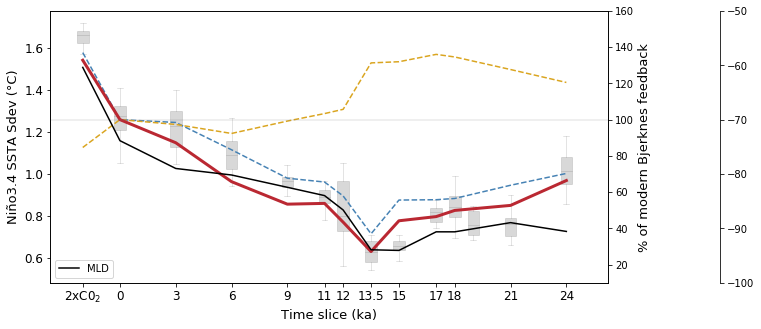

In [242]:
colors=plt.cm.RdBu(np.linspace(0,1,50))

sns.reset_orig()

pal=sns.color_palette("RdBu", len(sim_time))
sns.set_palette(pal)   

fig, ax2 = plt.subplots(figsize=[10,5])


# ---------------------------------------------------------------------------------------------------------

# ax2 = plt.subplot(2,2,2)

xasc=np.arange(27*2.2)*0.5-3.5
# sns.boxplot(x="x", y="y", data=df, order=xasc,ax=ax2,whis=1.5,width=1.7,palette="RdBu",linewidth=1.25,fliersize=0)
sns.boxplot(x="x", y="y", data=df, order=xasc,ax=ax2,whis=1.5,width=1.25,\
            color='grey',linewidth=1.25,fliersize=0, boxprops=dict(alpha=.3,linewidth=0.5),\
            medianprops=dict(alpha=.3,linewidth=0.5),whiskerprops=dict(alpha=.3,linewidth=0.5),capprops=dict(alpha=.3,linewidth=0.5))

# sns.swarmplot(x="x", y="y",data=df, order=xasc,ax=ax2, color=".25",s=2)

ax2.set_ylabel("Niño3.4 SSTA Sdev (°C)",fontsize=13)
ax2.set_xlabel("Time slice (ka)",fontsize=13)
loci=sim_time
loci[0]=-2
xasc_pos=[np.squeeze(np.where(xasc == i)) for i in loci]
ax2.set_xticks(xasc_pos)
time_slices2=np.copy(sim_time)
time_slices2=[str(i) for i in sim_time]
time_slices2[0]=r"2xC$0_{2}$"
ax2.set_xticklabels((time_slices2),fontsize=12)
ax2.tick_params(labelsize=12)

# ax2.grid(linestyle='--',linewidth=0.05,zorder=-1)


ax2.xaxis.grid(False)

ind           = np.squeeze([np.where((lon_sub >= 180 ) & (lon_sub <= 240))]) 
ind2           = np.squeeze([np.where((lon_sub >= 150 ) & (lon_sub <= 240))]) 
ind_atm       = np.squeeze([np.where((lon_atm_sub >= 180 ) & (lon_atm_sub <= 240))]) 

test1=np.nanmean(qperu[:,ind],axis=1)
test2=np.nanmean(upertx[:,ind],axis=1)
test3=np.nanmean(mld_hov2[:,ind2],axis=1)

par1 = ax2.twinx()
p3, = par1.plot(xasc_pos,test2/test2[1]*100,color='steelblue', label="BJ Ocean 1",linewidth=1.5,linestyle='--')
p3, = par1.plot(xasc_pos,test1/test1[1]*100,color='goldenrod', label="BJ Ocean 2 ",linewidth=1.5,linestyle='--')

p2, = par1.plot(xasc_pos,obf_hov_ts_n34/obf_hov_ts_n34[1]*100,color=colors[6], label="Oceanic BJ",linewidth=3)
# p4, = par1.plot(xasc_pos,abf_hov_ts_n34/abf_hov_ts_n34[1]*100,color='goldenrod', label="Atmospheric BJ",linewidth=1.5,linestyle='--')
# p2, = par1.plot(xasc_pos,abf_hov_ts_n34/abf_hov_ts_n34[1]*obf_hov_ts_n34/obf_hov_ts_n34[1],\
#                 color='k',linestyle='--', label="Atmospheric BJ",)
par1.plot([-10,10000],[100,100],linewidth=0.25,color='grey')


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
par2 = ax2.twinx()
par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
p4, = par2.plot(xasc_pos,-test3,color='k', label="MLD",linewidth=1.5)

par2.set_ylim(-100,-50)




par1.set_ylim(10,160)
par1.set_ylabel('% of modern Bjerknes feedback',fontsize=13)
mpl.rc('pdf', fonttype=42)

plt.legend(loc=3)
plt.savefig('ENSO_TIME_SLICE_PROJECT_FIGURE_3_2.pdf', bbox_inches='tight')

plt.show()

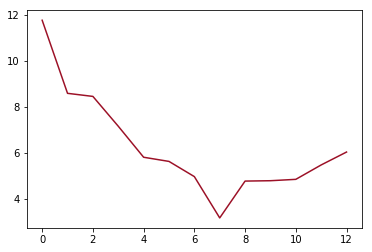

In [227]:
plt.plot(test2)

plt.show()

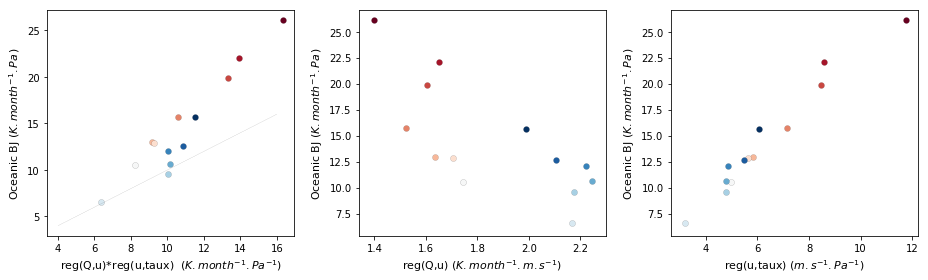

(-0.03737254791710121, 0.24137022631825802)

In [208]:
fig = plt.figure(figsize=(13, 4)) 

gs = gridspec.GridSpec(1, 3) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

data_cont={}
data_cont["data"]=nino_tx_hov
data_cont["lon"]=lon_atm_sub
data_cont["time"]=plt_dates

colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))

ind           = np.squeeze([np.where((lon_sub >= 180 ) & (lon_sub <= 240))]) 
ind_atm       = np.squeeze([np.where((lon_atm_sub >= 180 ) & (lon_atm_sub <= 240))]) 

# -------- 
inc=0
for i in sim: 
    
    ax1.scatter(np.nanmean((qperu*upertx)[:,ind],axis=1)[inc],np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )

    ax2.scatter(np.nanmean(qperu[:,ind],axis=1)[inc],np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )

# -------- 
    ax3.scatter(np.nanmean(upertx[:,ind],axis=1)[inc],np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    inc=inc+1

ax1.plot([4,16],[4,16],color='k', linewidth=0.1 , linestyle='--')


# ax3.set_ylim(0.5,2.25)
# ax3.set_xlim(0,50)

# ax3.set_title('Oceanic BJ',fontsize=11)
ax3.set_xlabel(r'reg(u,taux) ($m.s^{-1}.Pa^{-1}$)',fontsize=11)
ax3.set_ylabel('Oceanic BJ ($K.month^{-1}.Pa^{}$)',fontsize=11)


# ax1.set_ylim(0.5,2.25)
# ax1.set_xlim(0.025,0.6)

# ax1.set_title('Bjerknes Feedback',fontsize=11)
ax1.set_xlabel(r'reg(Q,u)*reg(u,taux)  ($K.month^{-1}.Pa^{-1}$)',fontsize=11)
ax1.set_ylabel('Oceanic BJ ($K.month^{-1}.Pa^{}$)',fontsize=11)


# ax2.set_title('Atmospheric BJ',fontsize=11)
ax2.set_xlabel(r'reg(Q,u) ($K.month^{-1}.m.s^{-1})$',fontsize=11)
ax2.set_ylabel('Oceanic BJ ($K.month^{-1}.Pa^{}$)',fontsize=11)

sl1, intercept, r_val4, p_value, std_err3 = linregress(np.nanmean(obf_hov_ts[:,ind],axis=1),np.nanmean(qperu[:,ind_atm],axis=1))
sl2, intercept, r_val4, p_value, std_err3 = linregress(np.nanmean(obf_hov_ts[:,ind],axis=1),np.nanmean(upertx[:,ind_atm],axis=1))


plt.tight_layout()

mpl.rc('pdf', fonttype=42)
plt.savefig('scatter_BJ_ENSO_REG_OCEN.pdf', bbox_inches='tight')


plt.show()

# np.nanmean(tssdev_hov_ts[:,ind],axis=1)),np.var(np.nanmean(obf_hov_ts[:,ind],axis=1)),np.var(np.nanmean(qperu[:,ind],axis=1)),np.var(np.nanmean(upertx[:,ind],axis=1))
sl1,sl2       
    

# np.corrcoef(np.nanmean(bf_hov_ts[:,ind],axis=1),sl1,sl2


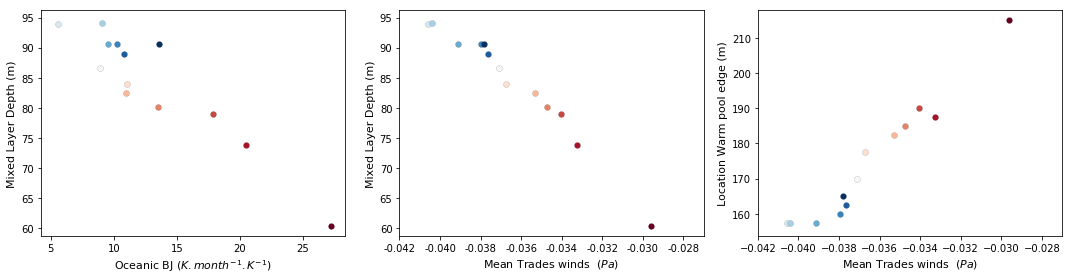

In [43]:
fig = plt.figure(figsize=(15, 4)) 

gs = gridspec.GridSpec(1, 3) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

data_cont={}
data_cont["data"]=nino_tx_hov
data_cont["lon"]=lon_atm_sub
data_cont["time"]=plt_dates

colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))


tauu_mean=np.zeros([len(sim)])
inc=0
for i in sim: 
    tauu_mean[inc]=np.nanmean(-atmos[i]['tauu_full'][:,:,:])
    inc=inc+1
    
ind           = np.squeeze([np.where((lon_sub >= 192 ) & (lon_sub <= 240))]) 
ind2           = np.squeeze([np.where((lon_sub >= 150 ) & (lon_sub <= 240))]) 
ind_atm       = np.squeeze([np.where((lon_atm_sub >= 192 ) & (lon_atm_sub <= 240))]) 

# -------- 
inc=0
for i in sim: 
    
    ax1.scatter(np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],np.nanmean(mld_hov2[:,ind2],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    ax2.scatter(tauu_mean[inc],np.nanmean(mld_hov2[:,ind2],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
    ax3.scatter(tauu_mean[inc],wpee[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )



    inc=inc+1
ax1.set_xlabel(r'Oceanic BJ ($K.month^{-1}.K^{-1}$)',fontsize=11)
ax1.set_ylabel('Mixed Layer Depth (m)',fontsize=11)

ax2.set_xlabel(r'Mean Trades winds  ($Pa$)',fontsize=11)
ax2.set_ylabel('Mixed Layer Depth (m)',fontsize=11)

ax3.set_xlabel(r'Mean Trades winds  ($Pa$)',fontsize=11)
ax3.set_ylabel('Location Warm pool edge (m)',fontsize=11)


ax2.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))




ax2.set_xlim(-0.042,-0.027)
ax3.set_xlim(-0.042,-0.027)
plt.tight_layout()



mpl.rc('pdf', fonttype=42)
plt.savefig('scatter_BJ_ENSO_REG_OCEN_MIXED_LAYER.pdf', bbox_inches='tight')


plt.show()

# np.corrcoef(np.nanmean(bf_hov_ts[:,ind],axis=1),np.nanmean(tssdev_hov_ts[:,ind],axis=1))





In [44]:
np.corrcoef(np.nanmean(upertx[:,ind],axis=1),np.nanmean(mld_hov2[:,ind2],axis=1)),\
np.corrcoef(tauu_mean,np.nanmean(mld_hov2[:,ind2],axis=1)),\
np.corrcoef(tauu_mean,wpee)


(array([[ 1.        , -0.94923289],
        [-0.94923289,  1.        ]]), array([[ 1.        , -0.97893901],
        [-0.97893901,  1.        ]]), array([[1.        , 0.97278727],
        [0.97278727, 1.        ]]))

In [45]:
wpee2

array([219.353385  , 196.84868633, 195.72327589, 194.59784925,
       193.47240653, 179.96589961, 188.97047778, 178.84026393,
       160.82849411, 165.33168492, 175.46327838, 184.46830452,
       183.34272446])

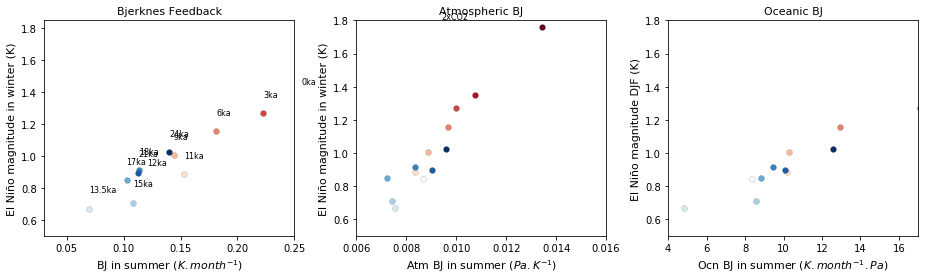

array([[1.        , 0.97590153],
       [0.97590153, 1.        ]])

In [46]:
fig = plt.figure(figsize=(13, 4)) 

gs = gridspec.GridSpec(1, 3) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

data_cont={}
data_cont["data"]=nino_tx_hov
data_cont["lon"]=lon_atm_sub
data_cont["time"]=plt_dates

colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))

ind           = np.squeeze([np.where((lon_sub >= 190 ) & (lon_sub <= 250))]) 
ind_atm       = np.squeeze([np.where((lon_atm_sub >= 170 ) & (lon_atm_sub <= 250))]) 

# -------- 
inc=0
for i in sim: 
    
#     ind       = np.squeeze([np.where((lon_sub >= maxilon[inc]-10 ) & (lon_sub <= maxilon[inc]+20))])
#     ind_atm       = np.squeeze([np.where((lon_atm_sub >= maxilon[inc]-40 ) & (lon_atm_sub <= maxilon[inc]+10))])
    
    
    ax1.scatter(np.nanmean((bf_hov_ts)[:,ind],axis=1)[inc],np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
#     ax1.scatter(np.nanmean(abf_hov_ts[:,ind_atm],axis=1)[inc]*np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],\
#                 np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc],color='k' ,alpha=0.35)
    ax1.text(np.nanmean(bf_hov_ts[:,ind],axis=1)[inc],np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc]+0.1, sim_name.split()[inc], fontsize=8)

    ax2.scatter(np.nanmean(abf_hov_ts[:,ind_atm],axis=1)[inc],np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
#     ax2.text(np.nanmean(abf_hov_ts[:,ind_atm],axis=1)[inc],np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc]+0.1, sim_name.split()[inc], fontsize=8)

# ax2.set_ylim(0.5,2.25)
# ax2.set_xlim(0.006,0.018)

# -------- 
    ax3.scatter(np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc],color=colors[inc], linewidth=0.1,edgecolors='k' )
#     ax3.text(np.nanmean(obf_hov_ts[:,ind],axis=1)[inc],np.nanmean(tssdev_hov_ts[:,ind],axis=1)[inc]+0.1, sim_name.split()[inc], fontsize=8)
    inc=inc+1

# ax3.set_ylim(0.5,2.25)
# ax3.set_xlim(0,50)

ax3.set_title('Oceanic BJ',fontsize=11)
ax3.set_xlabel(r'Ocn BJ in summer ($K.month^{-1}.Pa^{}$)',fontsize=11)
ax3.set_ylabel('El Niño magnitude DJF (K)',fontsize=11)

# ax1.set_ylim(0.5,2.25)
# ax1.set_xlim(0.025,0.6)

ax1.set_title('Bjerknes Feedback',fontsize=11)
ax1.set_xlabel(r'BJ in summer ($K.month^{-1}$)',fontsize=11)
ax1.set_ylabel('El Niño magnitude in winter (K)',fontsize=11)


ax2.set_title('Atmospheric BJ',fontsize=11)
ax2.set_xlabel(r'Atm BJ in summer ($Pa.K^{-1}$)',fontsize=11)
ax2.set_ylabel('El Niño magnitude in winter (K)',fontsize=11)



ax1.set_xlim(0.03,0.25)
ax1.set_ylim(0.5,1.85)


ax2.set_ylim(0.5,1.8)
ax2.set_xlim(0.006,0.016)

ax3.set_ylim(0.5,1.8)
ax3.set_xlim(4,17)


plt.tight_layout()



mpl.rc('pdf', fonttype=42)
plt.savefig('scatter_BJ_ENSO_MAG.pdf', bbox_inches='tight')


plt.show()

np.corrcoef(np.nanmean(bf_hov_ts[:,ind],axis=1),np.nanmean(tssdev_hov_ts[:,ind],axis=1))



In [47]:
# create time axis in function of lag 
base = datetime(2000, 1, 1)
arr = np.array([base + relativedelta(months=i) for i in range(12)])
plt_dates = mdates.date2num(arr)

In [48]:
# cmap2=plt.cm.RdBu(np.linspace(0,1,len(np.arange(0.5,3,0.1))))
cmap2=mpl.cm.get_cmap('Spectral')
cmap2(0.3)

(0.9914648212226067, 0.677354863514033, 0.37808535178777386, 1.0)

In [49]:
# fig, axi = plt.subplots(len(sim),5,figsize=(17,20))


# for i in range(len(sim)): 
#     if i == 0 : 
#         title0='Bjerknes feedback'
#         title1='Atmospheric\n Bjerknes feedback'
#         title2='Oceanic\n Bjerknes feedback'
#         title3='uos response to wind'
#         title4='damping'
        
#     else: 
#         for j in range(5):
#             exec('title'+str(j)+'=""')
            
#     if i == len(sim)-1: 
#         nocolorbar=True
#     else: 
#         nocolorbar=True
        
#     data_cont={}
#     data_cont["data"]=reghov[sim[i]+'4']
#     data_cont["lon"]=lon_sub
#     data_cont["time"]=plt_dates

#     hovmoeller(x=lon_sub,y=plt_dates,data=reghov[sim[i]],direction='x',ax=axi[i][0],fig=fig,\
#            vmin=-0.3,title=title0,cb_int=0.2,format_date=mdates.DateFormatter('%b'),\
#                contourf=True,ncont=21,cb_label=r"$month^{-1}$",data_cont=data_cont,clevel=np.arange(0.5,2,0.1),\
#                cfmt="%.1f",cont_cmap='inferno_r',nocolorbar=nocolorbar)
#     data_cont={}
#     data_cont["data"]=reghov[sim[i]+'7']
#     data_cont["lon"]=lon_atm_sub
#     data_cont["time"]=plt_dates
    

        
#     hovmoeller(x=lon_atm_sub,y=plt_dates,data=reghov[sim[i]+'2'],direction='x',ax=axi[i][1],fig=fig,\
#            vmin=-0.015,title=title1,cb_int=0.01,format_date=mdates.DateFormatter('%b'),\
#                contourf=True,ncont=21,cb_label=r"$Pa.K^{-1}$",data_cont=data_cont,clevel=np.arange(0,0.02,0.001),\
#                cfmt="%.3f",cont_cmap='inferno_r',nocolorbar=nocolorbar)

#     hovmoeller(x=lon_sub,y=plt_dates,data=reghov[sim[i]+'3'],direction='x',ax=axi[i][2],fig=fig,\
#            vmin=-40,title=title2,cb_int=25,format_date=mdates.DateFormatter('%b'),\
#                contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$",nocolorbar=nocolorbar)

#     if sim[i] == '2xco2' or sim[i]== '6ka':
#         hovmoeller(x=lon_sub,y=plt_dates,data=reghov[sim[i]+'5']/100,direction='x',ax=axi[i][3],fig=fig,\
#                vmin=-25,title=title3,cb_int=25,format_date=mdates.DateFormatter('%b'),\
#                    contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$",nocolorbar=nocolorbar)
#     else: 
#         hovmoeller(x=lon_sub,y=plt_dates,data=reghov[sim[i]+'5'],direction='x',ax=axi[i][3],fig=fig,\
#        vmin=-25,title=title3,cb_int=25,format_date=mdates.DateFormatter('%b'),\
#            contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$",nocolorbar=nocolorbar)

#     hovmoeller(x=lon_sub,y=plt_dates,data=reghov[sim[i]+'6'],direction='x',ax=axi[i][4],fig=fig,\
#            vmin=-0.4,title=title4,cb_int=0.2,format_date=mdates.DateFormatter('%b'),\
#                contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$",nocolorbar=nocolorbar)

# # mpl.rc('pdf', fonttype=42)
# # plt.savefig('BJ_feedback_IO_eq_mode.pdf', bbox_inches='tight')

# plt.show()

In [50]:
lon_sub[ind[-1]]

249.72448757949263

In [51]:
wpeeka=np.zeros(12)
inc=0
for i in range(12):
    ind=np.squeeze(np.where(np.nanmean(ocean['0ka']['tos_full'][:,i,:],axis=0) > 28.3))
    wpeeka[inc]=lon_sub[ind[-1]]
    inc=inc+1

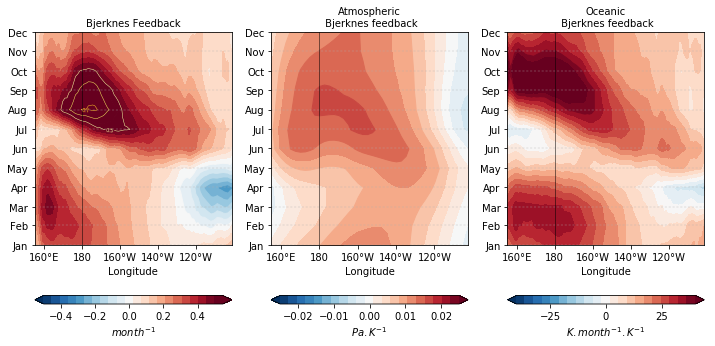

In [52]:
fig, axi = plt.subplots(1,3,figsize=(12,5))

data_cont={}
data_cont["data"]=reghov['0ka']
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['0ka'],direction='x',ax=axi[0],fig=fig,\
       vmin=-0.5,title='Bjerknes Feedback',cb_int=0.2,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$month^{-1}$",data_cont=data_cont,clevel=np.arange(0.5,2,0.1),\
           cfmt="%.1f",cont_cmap='inferno_r',zoom=[155,260])

data_cont={}
data_cont["data"]=reghov['0ka7']
data_cont["lon"]=lon_atm_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_atm_sub,y=plt_dates,data=reghov['0ka2'],direction='x',ax=axi[1],fig=fig,\
       vmin=-0.025,title='Atmospheric\n Bjerknes feedback',cb_int=0.01,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$Pa.K^{-1}$",clevel=np.arange(0,0.02,0.001),\
           cfmt="%.1f",cont_cmap='inferno_r',zoom=[155,260])
# axi[1].plot(wpeeka, plt_dates, linestyle='--', linewidth=1,color='k')

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['0ka3'],direction='x',ax=axi[2],fig=fig,\
       vmin=-40,title='Oceanic\n Bjerknes feedback',cb_int=25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$",zoom=[155,260])

# hovmoeller(x=lon_sub,y=plt_dates,data=reghov['0ka5'],direction='x',ax=axi[3],fig=fig,\
#        vmin=-25,title='uos response to wind',cb_int=25,format_date=mdates.DateFormatter('%b'),\
#            contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

# hovmoeller(x=lon_atm_sub,y=plt_dates,data=reghov['0ka7'],direction='x',ax=axi[4],fig=fig,\
#        vmin=-0.02,title='Damping',cb_int=0.25,format_date=mdates.DateFormatter('%b'),\
#            contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

mpl.rc('pdf', fonttype=42)
plt.savefig('BJ_feedback_IO_eq_mode.pdf', bbox_inches='tight')

plt.show()

In [53]:
reghov['0ka7'].shape , reghov['0ka6'].shape

((12, 55), (12, 120))

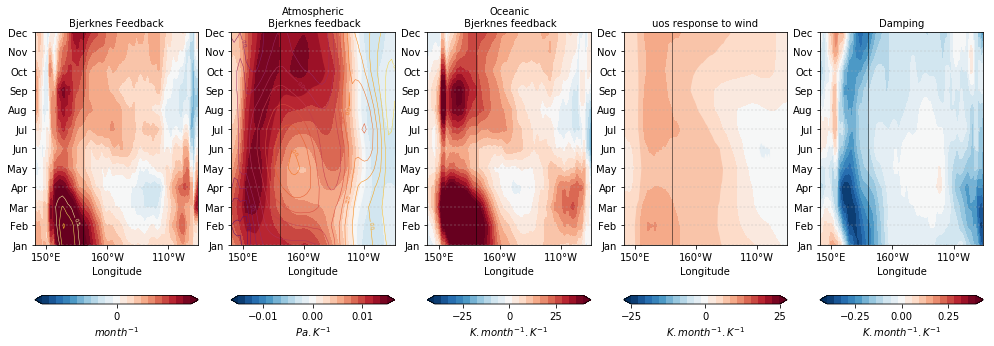

In [54]:
fig, axi = plt.subplots(1,5,figsize=(17,5))

data_cont={}
data_cont["data"]=reghov['21ka']
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['21ka'],direction='x',ax=axi[0],fig=fig,\
       vmin=-0.4,title='Bjerknes Feedback',cb_int=0.5,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$month^{-1}$",data_cont=data_cont,clevel=np.arange(0.5,2,0.1),\
           cfmt="%.1f",cont_cmap='inferno_r')

data_cont={}
data_cont["data"]=reghov['21ka7']
data_cont["lon"]=lon_atm_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_atm_sub,y=plt_dates,data=reghov['21ka2'],direction='x',ax=axi[1],fig=fig,\
       vmin=-0.015,title='Atmospheric\n Bjerknes feedback',cb_int=0.01,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$Pa.K^{-1}$",data_cont=data_cont,clevel=np.arange(0,0.02,0.001),\
           cfmt="%.1f",cont_cmap='inferno_r')

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['21ka3'],direction='x',ax=axi[2],fig=fig,\
       vmin=-40,title='Oceanic\n Bjerknes feedback',cb_int=25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['21ka5'],direction='x',ax=axi[3],fig=fig,\
       vmin=-25,title='uos response to wind',cb_int=25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['21ka6'],direction='x',ax=axi[4],fig=fig,\
       vmin=-0.4,title='Damping',cb_int=0.25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

# mpl.rc('pdf', fonttype=42)
# plt.savefig('BJ_feedback_IO_eq_mode.pdf', bbox_inches='tight')

plt.show()

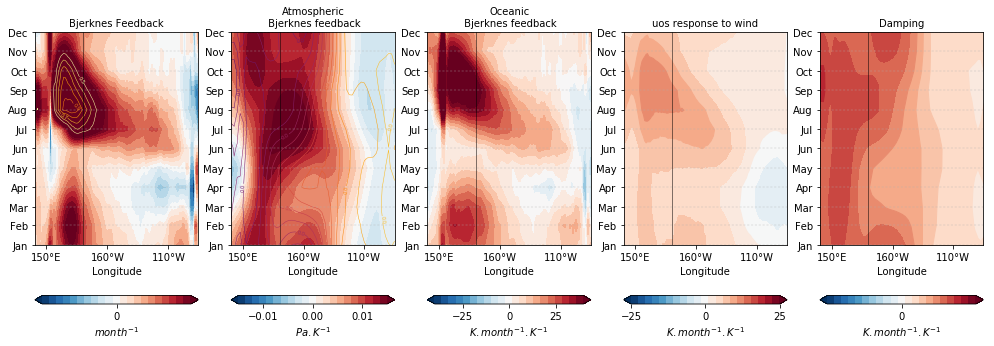

In [55]:
fig, axi = plt.subplots(1,5,figsize=(17,5))

data_cont={}
data_cont["data"]=reghov['9ka']
data_cont["lon"]=lon_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['9ka'],direction='x',ax=axi[0],fig=fig,\
       vmin=-0.4,title='Bjerknes Feedback',cb_int=0.5,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$month^{-1}$",data_cont=data_cont,clevel=np.arange(0.5,2,0.1),\
           cfmt="%.1f",cont_cmap='inferno_r')

data_cont={}
data_cont["data"]=reghov['9ka7']
data_cont["lon"]=lon_atm_sub
data_cont["time"]=plt_dates

hovmoeller(x=lon_atm_sub,y=plt_dates,data=reghov['9ka2'],direction='x',ax=axi[1],fig=fig,\
       vmin=-0.015,title='Atmospheric\n Bjerknes feedback',cb_int=0.01,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$Pa.K^{-1}$",data_cont=data_cont,clevel=np.arange(0,0.02,0.001),\
           cfmt="%.1f",cont_cmap='inferno_r')

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['9ka3'],direction='x',ax=axi[2],fig=fig,\
       vmin=-40,title='Oceanic\n Bjerknes feedback',cb_int=25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

hovmoeller(x=lon_sub,y=plt_dates,data=reghov['9ka5'],direction='x',ax=axi[3],fig=fig,\
       vmin=-25,title='uos response to wind',cb_int=25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

hovmoeller(x=lon_atm_sub,y=plt_dates,data=reghov['9ka7'],direction='x',ax=axi[4],fig=fig,\
       vmin=-0.02,title='Damping',cb_int=0.25,format_date=mdates.DateFormatter('%b'),\
           contourf=True,ncont=21,cb_label=r"$K.month^{-1}.K^{-1}$")

# mpl.rc('pdf', fonttype=42)
# plt.savefig('BJ_feedback_IO_eq_mode.pdf', bbox_inches='tight')

plt.show()

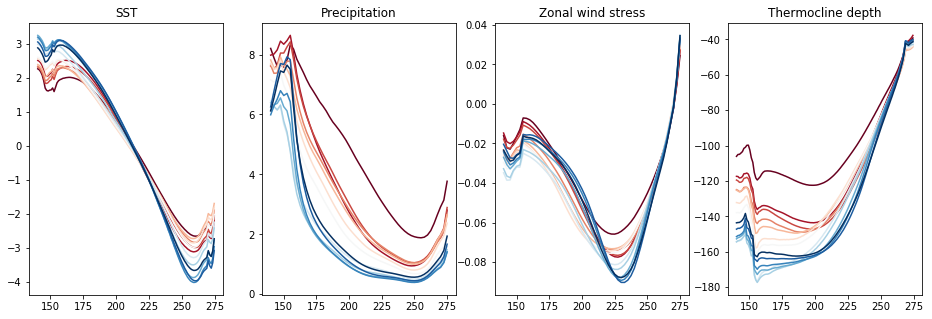

In [56]:
fig, axi = plt.subplots(1,4,figsize=(16,5))

colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))

inc=0
for i in sim: 
    axi[0].plot(lon_sub,np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0)-\
                np.nanmean(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0)),color=colors[inc])
    inc=inc+1
axi[0].set_title('SST')

inc=0
for i in sim: 
    axi[1].plot(lon_atm_sub,np.nanmean(np.nanmean(atmos[i]['pr_full'][:,6:9,:],axis=1),axis=0)*86400*1000,color=colors[inc])
    inc=inc+1
axi[1].set_title('Precipitation')
inc=0
for i in sim: 
    axi[2].plot(lon_atm_sub,np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,6:9,:],axis=1),axis=0),color=colors[inc])
    inc=inc+1
axi[2].set_title('Zonal wind stress')    

inc=0
for i in sim: 
    axi[3].plot(lon_sub,np.nanmean(np.nanmean(-ocean[i]['ztc_full'][:,6:9,:],axis=1),axis=0),color=colors[inc])
    inc=inc+1
axi[3].set_title('Thermocline depth')


    
plt.show()

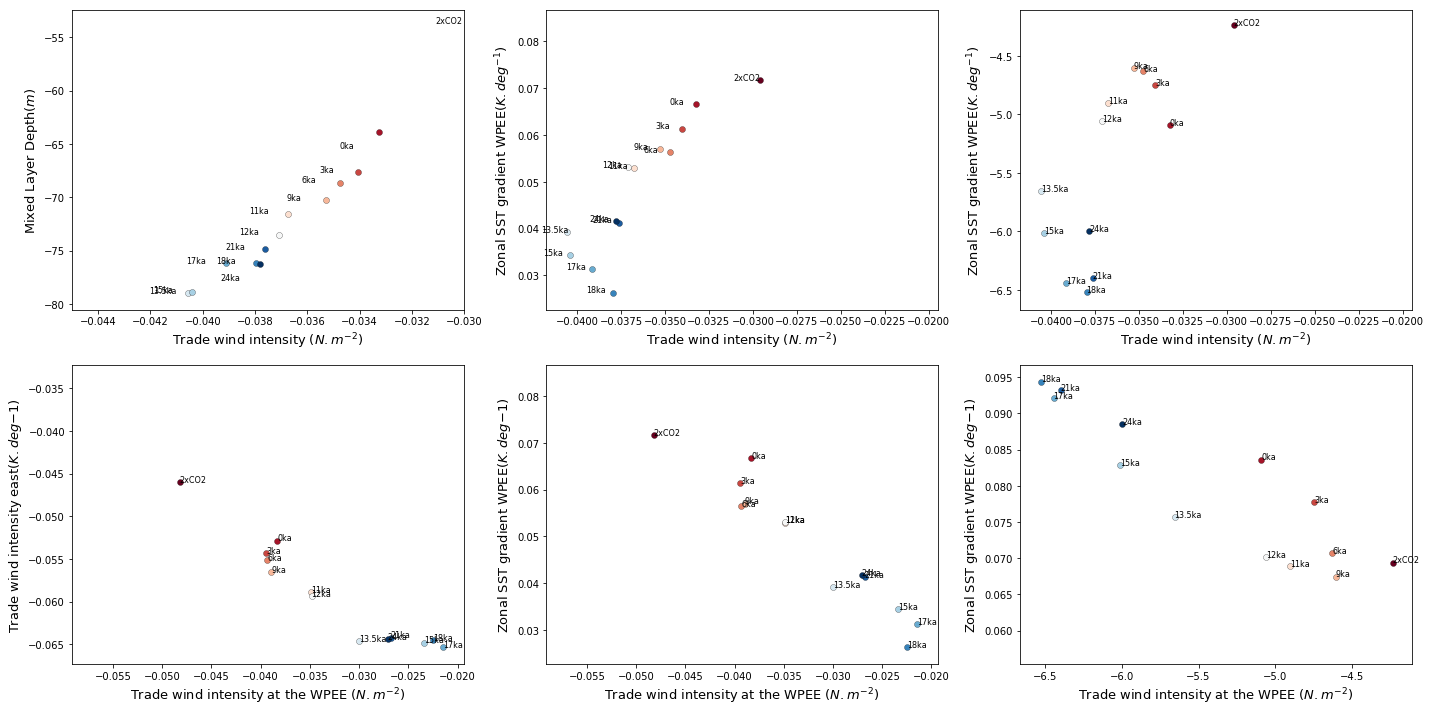

In [57]:
tauu_mean=np.zeros([len(sim)])
tauu_mean_sum=np.zeros([len(sim)])
tauu_mean_east=np.zeros([len(sim)])
tauu_mean_west=np.zeros([len(sim)])
tauu_mean_wp=np.zeros([len(sim)])
tauu_mean_n3=np.zeros([len(sim)])
tauu_mean_cent=np.zeros([len(sim)])
tauu_mean_grad=np.zeros([len(sim)])




mld_mean=np.zeros([len(sim)])
inc=0
for i in sim: 
    tauu_mean[inc]=np.nanmean(-atmos[i]['tauu_full'][:,:,:])
    tauu_mean_sum[inc]=np.nanmean(-atmos[i]['tauu_full'][:,6:9,:])
    indw=np.where((lon_atm_sub > 150) & (lon_atm_sub < 180))
    tauu_mean_west[inc]=np.nanmean(np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,:,:],axis=1),axis=0)[indw])
    inde=np.where((lon_atm_sub > 200) & (lon_atm_sub < 250))
    tauu_mean_east[inc]=np.nanmean(np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,:,:],axis=1),axis=0)[inde])
    indc=np.where((lon_atm_sub > 170) & (lon_atm_sub < 200))
    tauu_mean_cent[inc]=np.nanmean(np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,:,:],axis=1),axis=0)[indc])
    indg=np.where((lon_atm_sub > 180) & (lon_atm_sub < 220))  
    tauu_mean_grad[inc]=np.nanmean(np.gradient(np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,:,:],axis=1),axis=0)[indc]))


    
    wpeei=np.fix(wpeem[inc])
    indwp=np.where((lon_atm_sub > wpeei-10) & (lon_atm_sub < wpeei+15))
    tauu_mean_wp[inc]=np.nanmean((np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,:,:],axis=1),axis=0))[indwp])
    
    indn3=np.where((lon_atm_sub > 190) & (lon_atm_sub < 240))
    tauu_mean_n3[inc]=np.nanmean((np.nanmean(np.nanmean(-atmos[i]['tauu_full'][:,:,:],axis=1),axis=0))[indn3])


    
    mld_mean[inc]=np.nanmean(mld[i]) 
    inc=inc+1

# print(np.corrcoef(DTdx_bar,tauu_mean_wp))

DTdx_bar_n3=np.zeros(len(sim))
DTdx_bar=np.zeros(len(sim))
DTdx_bar_tot=np.zeros(len(sim))
inc=0
for i in sim: 
    wpeei=np.fix(wpeem[inc])
    ind=np.where((lon_sub > wpeei-20) & (lon_sub < wpeei+20))
    DTdx_bar[inc]= np.nanmean(np.gradient(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0))[ind])
    
    ind1=np.where((lon_sub > 140) & (lon_sub < 160))
    ind2=np.where((lon_sub > 240) & (lon_sub < 290))
    DTdx_bar_tot[inc]= np.nanmean(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0)[ind1])-\
                        np.nanmean(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0)[ind2])
        
    ind3=np.where((lon_sub > 190) & (lon_sub < 240))
    DTdx_bar_n3[inc]=np.nanmean(np.gradient(np.nanmean(np.nanmean(ocean[i]['tos_full'][:,6:9,:],axis=1),axis=0))[ind3])
    
    inc=inc+1

ztc_bar_tilt=np.zeros(len(sim))
ztc_bar_tot=np.zeros(len(sim))
inc=0
for i in sim:     
    ind1=np.where((lon_sub > 140) & (lon_sub < 160))
    ind2=np.where((lon_sub > 240) & (lon_sub < 290))
    ztc_bar_tilt[inc]= np.nanmean(np.nanmean(np.nanmean(ocean[i]['ztc_full'][:,:,:],axis=1),axis=0)[ind1])-\
                        np.nanmean(np.nanmean(np.nanmean(ocean[i]['ztc_full'][:,:,:],axis=1),axis=0)[ind2])
        
    ind3=np.where((lon_sub > 140) & (lon_sub < 250))
    ztc_bar_tot[inc]=np.nanmean(np.gradient(np.nanmean(np.nanmean(ocean[i]['ztc_full'][:,:,:],axis=1),axis=0))[ind3])
    
    inc=inc+1    
    

colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))
fig, axi = plt.subplots(2,3,figsize=(20,10))
#1------- 
inc=0
for i in sim:
    axi[0][0].scatter(tauu_mean[inc],-mld_mean[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    
    if sim[inc] == '0ka' or  sim[inc] == '24ka' :
        axi[0][0].text(tauu_mean[inc]-0.0015, -mld_mean[inc]-1.5, sim_name.split()[inc], fontsize=8)
    else: 
        axi[0][0].text(tauu_mean[inc]-0.0015, -mld_mean[inc], sim_name.split()[inc], fontsize=8)
        
    inc=inc+1
axi[0][0].set_xlabel(r'Trade wind intensity ($N.m^{-2}$)',fontsize=13)
axi[0][0].set_ylabel(r'Mixed Layer Depth($m$)',fontsize=13)
axi[0][0].set_xlim(-0.045,-0.03)
#2------- 

inc=0
for i in sim:
    axi[0][1].scatter(tauu_mean[inc],-DTdx_bar[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[0][1].text(tauu_mean[inc]-0.0015, -DTdx_bar[inc], sim_name.split()[inc], fontsize=8)
        
    inc=inc+1
axi[0][1].set_xlabel(r'Trade wind intensity ($N.m^{-2}$)',fontsize=13)
axi[0][1].set_ylabel(r'Zonal SST gradient WPEE($K.deg^{-1}$)',fontsize=13)
# axi[0][1].set_xlim(-0.045,-0.03)
# axi[0][1].set_ylim(0.01,0.08)

#3------- 

inc=0
for i in sim:
    axi[0][2].scatter(tauu_mean[inc],-DTdx_bar_tot[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[0][2].text(tauu_mean[inc], -DTdx_bar_tot[inc], sim_name.split()[inc], fontsize=8)
        
    inc=inc+1
axi[0][2].set_xlabel(r'Trade wind intensity ($N.m^{-2}$)',fontsize=13)
axi[0][2].set_ylabel(r'Zonal SST gradient WPEE($K.deg^{-1}$)',fontsize=13)
# axi[2].set_xlim(-0.045,-0.03)
# axi[2].set_ylim(0.04,0.08)

#4------- 

inc=0
for i in sim:
    axi[1][0].scatter(tauu_mean_wp[inc],tauu_mean_east[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[1][0].text(tauu_mean_wp[inc],tauu_mean_east[inc], sim_name.split()[inc], fontsize=8)

        
    inc=inc+1
axi[1][0].set_xlabel(r'Trade wind intensity at the WPEE ($N.m^{-2}$)',fontsize=13)
axi[1][0].set_ylabel(r'Trade wind intensity east($K.deg{-1}$)',fontsize=13)
# axi[1][0].set_xlim(-0.042,-0.024) 
# axi[1][0].set_ylim(-0.070,-0.045) 


#5------- 

inc=0
for i in sim:
    axi[1][1].scatter(tauu_mean_wp[inc],-DTdx_bar[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[1][1].text(tauu_mean_wp[inc],-DTdx_bar[inc], sim_name.split()[inc], fontsize=8)

        
    inc=inc+1
axi[1][1].set_xlabel(r'Trade wind intensity at the WPEE ($N.m^{-2}$)',fontsize=13)
axi[1][1].set_ylabel(r'Zonal SST gradient WPEE($K.deg{-1}$)',fontsize=13)
# axi[1][1].set_xlim(-0.042,-0.024) 
# axi[1][1].set_ylim(0.04,0.08)

#6------- 

inc=0
for i in sim:
    axi[1][2].scatter((-DTdx_bar_tot)[inc],-DTdx_bar_n3[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[1][2].text((-DTdx_bar_tot)[inc],-DTdx_bar_n3[inc], sim_name.split()[inc], fontsize=8)

        
    inc=inc+1
axi[1][2].set_xlabel(r'Trade wind intensity at the WPEE ($N.m^{-2}$)',fontsize=13)
axi[1][2].set_ylabel(r'Zonal SST gradient WPEE($K.deg{-1}$)',fontsize=13)
# axi[1][2].set_xlim(-0.042,-0.024) 
# axi[1][2].set_ylim(0.04,0.08)

plt.tight_layout()


plt.show()

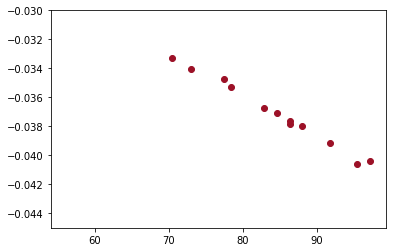

In [58]:
plt.scatter(ztc_bar_tilt,tauu_mean)
plt.ylim(-0.045,-0.03)
plt.show()

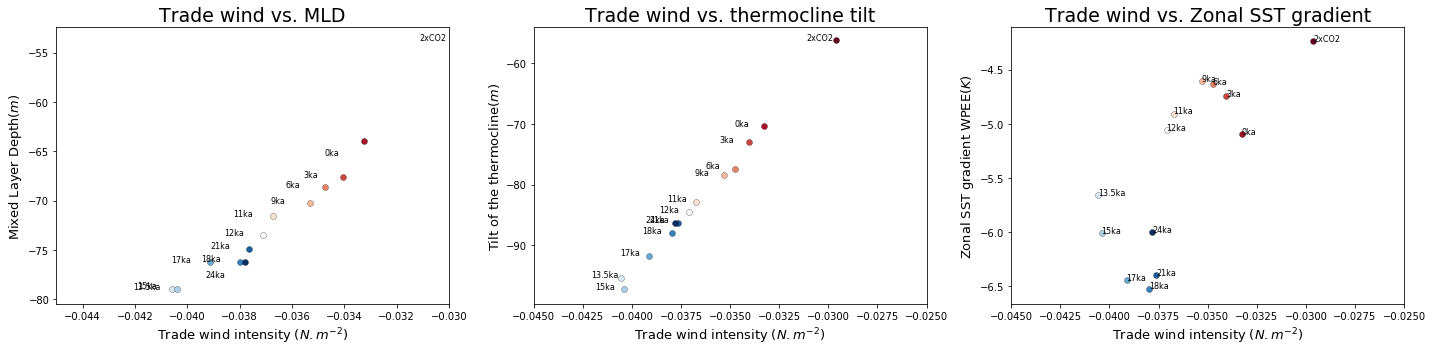

In [243]:
colors=plt.cm.RdBu(np.linspace(0,1,len(sim)))
fig, axi = plt.subplots(1,3,figsize=(20,5))
#1------- 
inc=0
for i in sim:
    axi[0].scatter(tauu_mean[inc],-mld_mean[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    
    if sim[inc] == '0ka' or  sim[inc] == '24ka' :
        axi[0].text(tauu_mean[inc]-0.0015, -mld_mean[inc]-1.5, sim_name.split()[inc], fontsize=8)
    else: 
        axi[0].text(tauu_mean[inc]-0.0015, -mld_mean[inc], sim_name.split()[inc], fontsize=8)
        
    inc=inc+1
axi[0].set_xlabel(r'Trade wind intensity ($N.m^{-2}$)',fontsize=13)
axi[0].set_ylabel(r'Mixed Layer Depth($m$)',fontsize=13)
axi[0].set_xlim(-0.045,-0.03)
axi[0].set_title('Trade wind vs. MLD',fontsize=19)
#2------- 

inc=0
for i in sim:
    axi[1].scatter(tauu_mean[inc],-ztc_bar_tilt[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[1].text(tauu_mean[inc]-0.0015, -ztc_bar_tilt[inc], sim_name.split()[inc], fontsize=8)
        
    inc=inc+1
axi[1].set_xlabel(r'Trade wind intensity ($N.m^{-2}$)',fontsize=13)
axi[1].set_ylabel(r'Tilt of the thermocline($m$)',fontsize=13)
axi[1].set_xlim(-0.045,-0.025)
axi[1].set_title('Trade wind vs. thermocline tilt',fontsize=19)
# axi[1].set_ylim(0.01,0.08)

#3------- 

inc=0
for i in sim:
    axi[2].scatter(tauu_mean[inc],-DTdx_bar_tot[inc],color=colors[inc],linewidths=0.25,edgecolors='k')
    axi[2].text(tauu_mean[inc], -DTdx_bar_tot[inc], sim_name.split()[inc], fontsize=8)
        
    inc=inc+1
axi[2].set_xlabel(r'Trade wind intensity ($N.m^{-2}$)',fontsize=13)
axi[2].set_ylabel(r'Zonal SST gradient WPEE($K$)',fontsize=13)
axi[2].set_xlim(-0.045,-0.025)
axi[2].set_title('Trade wind vs. Zonal SST gradient',fontsize=19)
# axi[2].set_ylim(0.04,0.08)

#4------- 

plt.tight_layout()


plt.show()

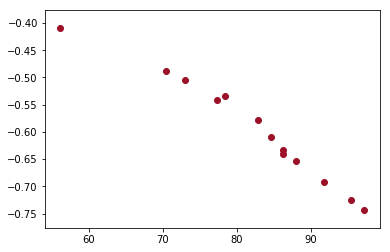

In [60]:
plt.scatter(ztc_bar_tilt,ztc_bar_tot)
plt.show()

In [61]:
aa=[]
aa.extend([10.])
aa

[10.0]